In [147]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import os

# 1. Loading and browser data

In [148]:
# Importing the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [149]:
# Take a look at the overview of the datasets
train.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
3003,p,f,f,g,f,f,f,c,b,g,...,p,n,p,w,o,l,h,v,g,4267
3936,p,f,y,p,t,n,f,c,b,r,...,w,w,p,w,t,p,r,v,m,5593
3620,p,f,s,b,t,n,f,c,b,r,...,w,w,p,w,t,p,r,v,g,5140
1881,e,f,f,n,t,n,f,c,b,n,...,p,w,p,w,o,p,n,y,d,2671
5223,p,k,s,n,f,f,f,c,n,b,...,p,p,p,w,o,e,w,v,p,7470


In [150]:
test.sample(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
1425,x,y,y,f,f,f,c,b,g,e,...,n,n,p,w,o,l,h,y,g,4798
1821,x,s,c,t,n,f,c,b,w,e,...,w,w,p,w,t,p,w,v,p,6120
149,x,y,y,t,a,f,c,b,w,e,...,w,w,p,w,o,p,k,s,g,494
2183,k,y,n,f,s,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,7264
785,x,y,e,t,n,f,c,b,w,t,...,p,w,p,w,o,p,k,v,d,2658


# 2. EDA for missing values

In [151]:
print("The shape of the train data is (row, column):" + str(train.shape))
print(train.info())
print("The shape of the test data is (row, column):" + str(test.shape))
print(test.info())

The shape of the train data is (row, column):(5657, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 24 columns):
class                       5657 non-null object
cap-shape                   5657 non-null object
cap-surface                 5657 non-null object
cap-color                   5657 non-null object
bruises                     5657 non-null object
odor                        5657 non-null object
gill-attachment             5657 non-null object
gill-spacing                5657 non-null object
gill-size                   5657 non-null object
gill-color                  5657 non-null object
stalk-shape                 5657 non-null object
stalk-root                  5657 non-null object
stalk-surface-above-ring    5657 non-null object
stalk-surface-below-ring    5657 non-null object
stalk-color-above-ring      5657 non-null object
stalk-color-below-ring      5657 non-null object
veil-type                   5657 non-null object
veil

In [152]:
# Save the id in advance in order to submit later
trainId = train.Id
testId = test.Id
# I will drop Id because for it will not be used for our data
# train.drop(['Id], axis=1, inplace=True)
# test.drop(['Id], axis=1, inplace=True)
print(train.info())
print("*"*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 24 columns):
class                       5657 non-null object
cap-shape                   5657 non-null object
cap-surface                 5657 non-null object
cap-color                   5657 non-null object
bruises                     5657 non-null object
odor                        5657 non-null object
gill-attachment             5657 non-null object
gill-spacing                5657 non-null object
gill-size                   5657 non-null object
gill-color                  5657 non-null object
stalk-shape                 5657 non-null object
stalk-root                  5657 non-null object
stalk-surface-above-ring    5657 non-null object
stalk-surface-below-ring    5657 non-null object
stalk-color-above-ring      5657 non-null object
stalk-color-below-ring      5657 non-null object
veil-type                   5657 non-null object
veil-color                  5657 non-null object
ring-number

There is no missing value.

# 3. Visualization and Feature Relations

## 3a. cap-shape and class

In [153]:
train['cap-shape'].value_counts()

x    2575
f    2205
k     553
b     299
s      23
c       2
Name: cap-shape, dtype: int64

In [154]:
percent = pd.DataFrame(round(train['cap-shape'].value_counts(normalize=True)*100,2))
total = pd.DataFrame(train['cap-shape'].value_counts())
total.columns = ["Total"]
percent.columns = ['Percent']
pd.concat([total, percent], axis = 1)

,Total,Percent
x,2575,45.52
f,2205,38.98
k,553,9.78
b,299,5.29
s,23,0.41
c,2,0.04


In [155]:
train['class'].value_counts()

e    2956
p    2701
Name: class, dtype: int64

In [156]:
# In order not to mess up the train dataset, copy the train to another variable
train_copy = train.copy()

In [157]:
test_copy = test.copy()

In [158]:
# Encode class
for i in range(len(train_copy['class'])):
    if train_copy['class'][i] == 'p':
        train_copy['class'][i] = 1
    else:
        train_copy['class'][i] = 0

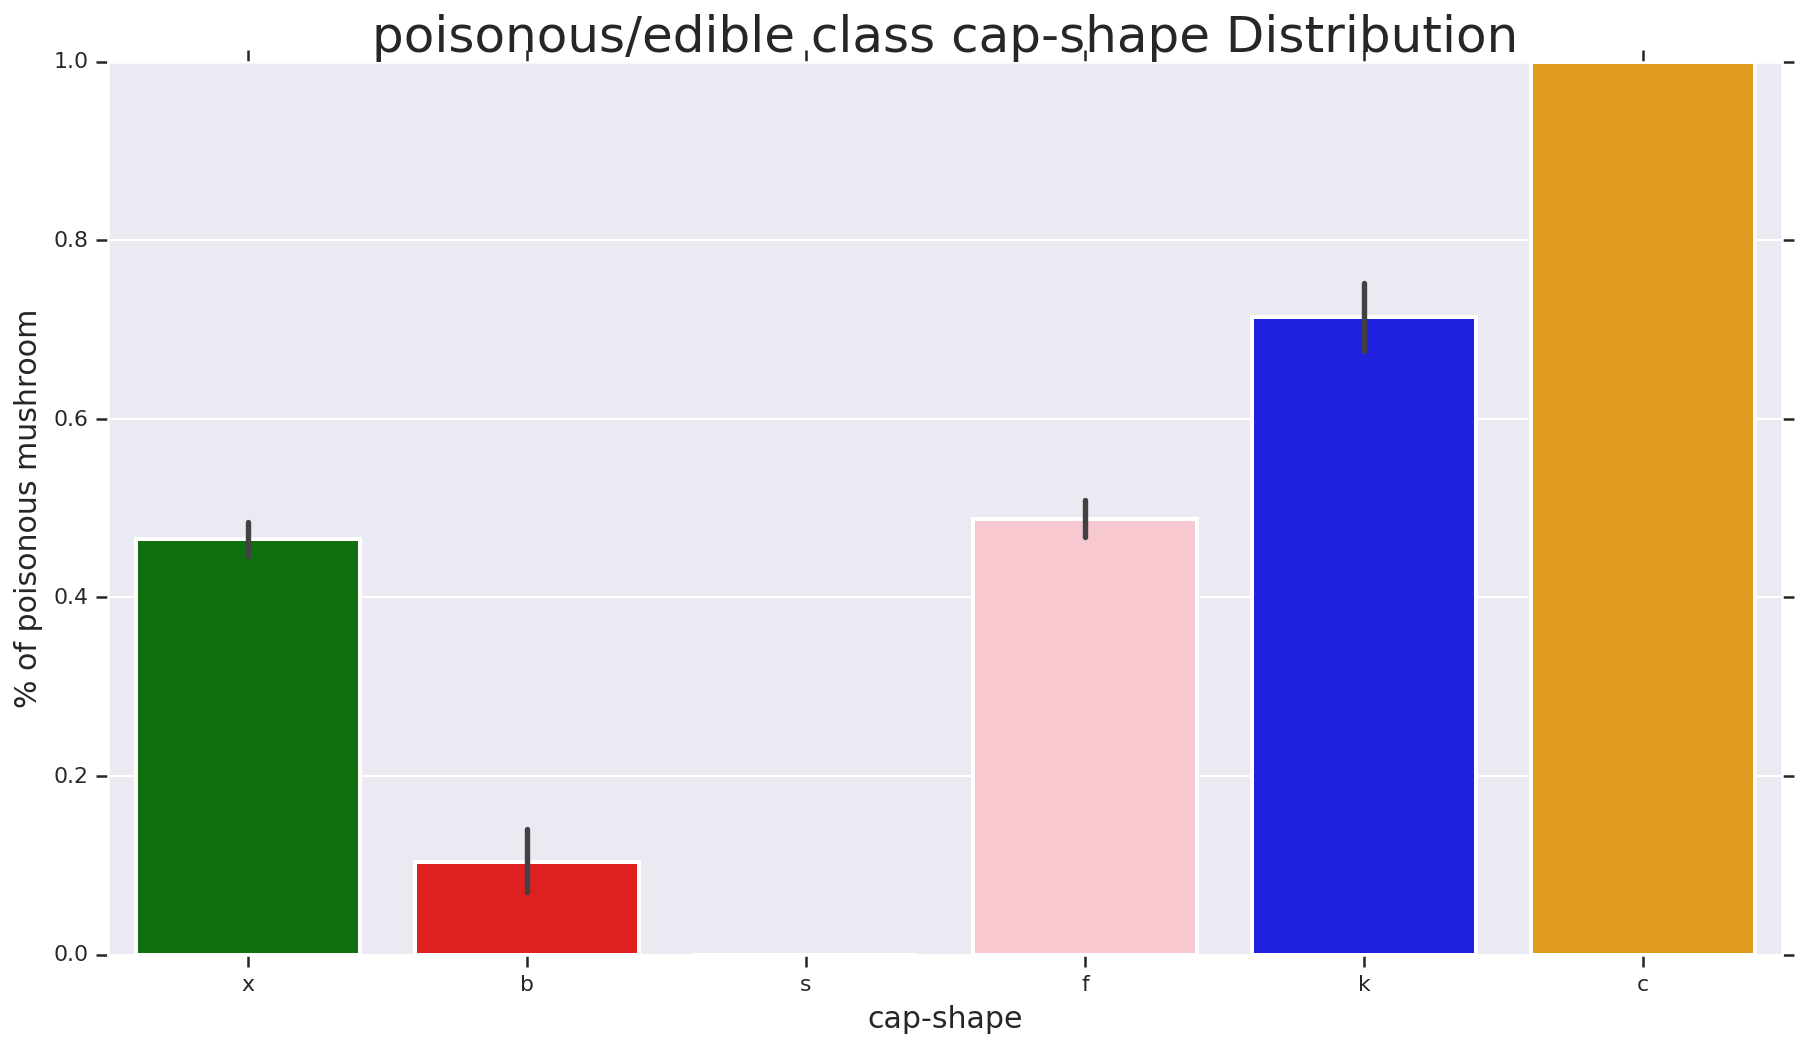

In [159]:
pal = {'x':"green", 'f':"Pink", 'k':"blue", 'b':"red", 's':"yellow", 'c':"orange"}
plt.subplots(figsize = (15, 8))
ax = sns.barplot(x = "cap-shape", y = "class", data=train_copy, palette = pal, linewidth=2)
plt.title("poisonous/edible class cap-shape Distribution", fontsize = 25)
plt.ylabel("% of poisonous mushroom", fontsize = 15)
plt.xlabel("cap-shape", fontsize = 15);

The bar plot above shows the distribution of x, b, s, f, k and c poisonous mushroom, the x_label represents cap-shape feature while the y_label represents the % of poisonous mushroom. The bar chart shows about 45% of x are poisonous, 10% of b are poisonous, none of s are poisonous, 50% of f are poisonous, 75% of k are poisonous and all of c are poisonous.

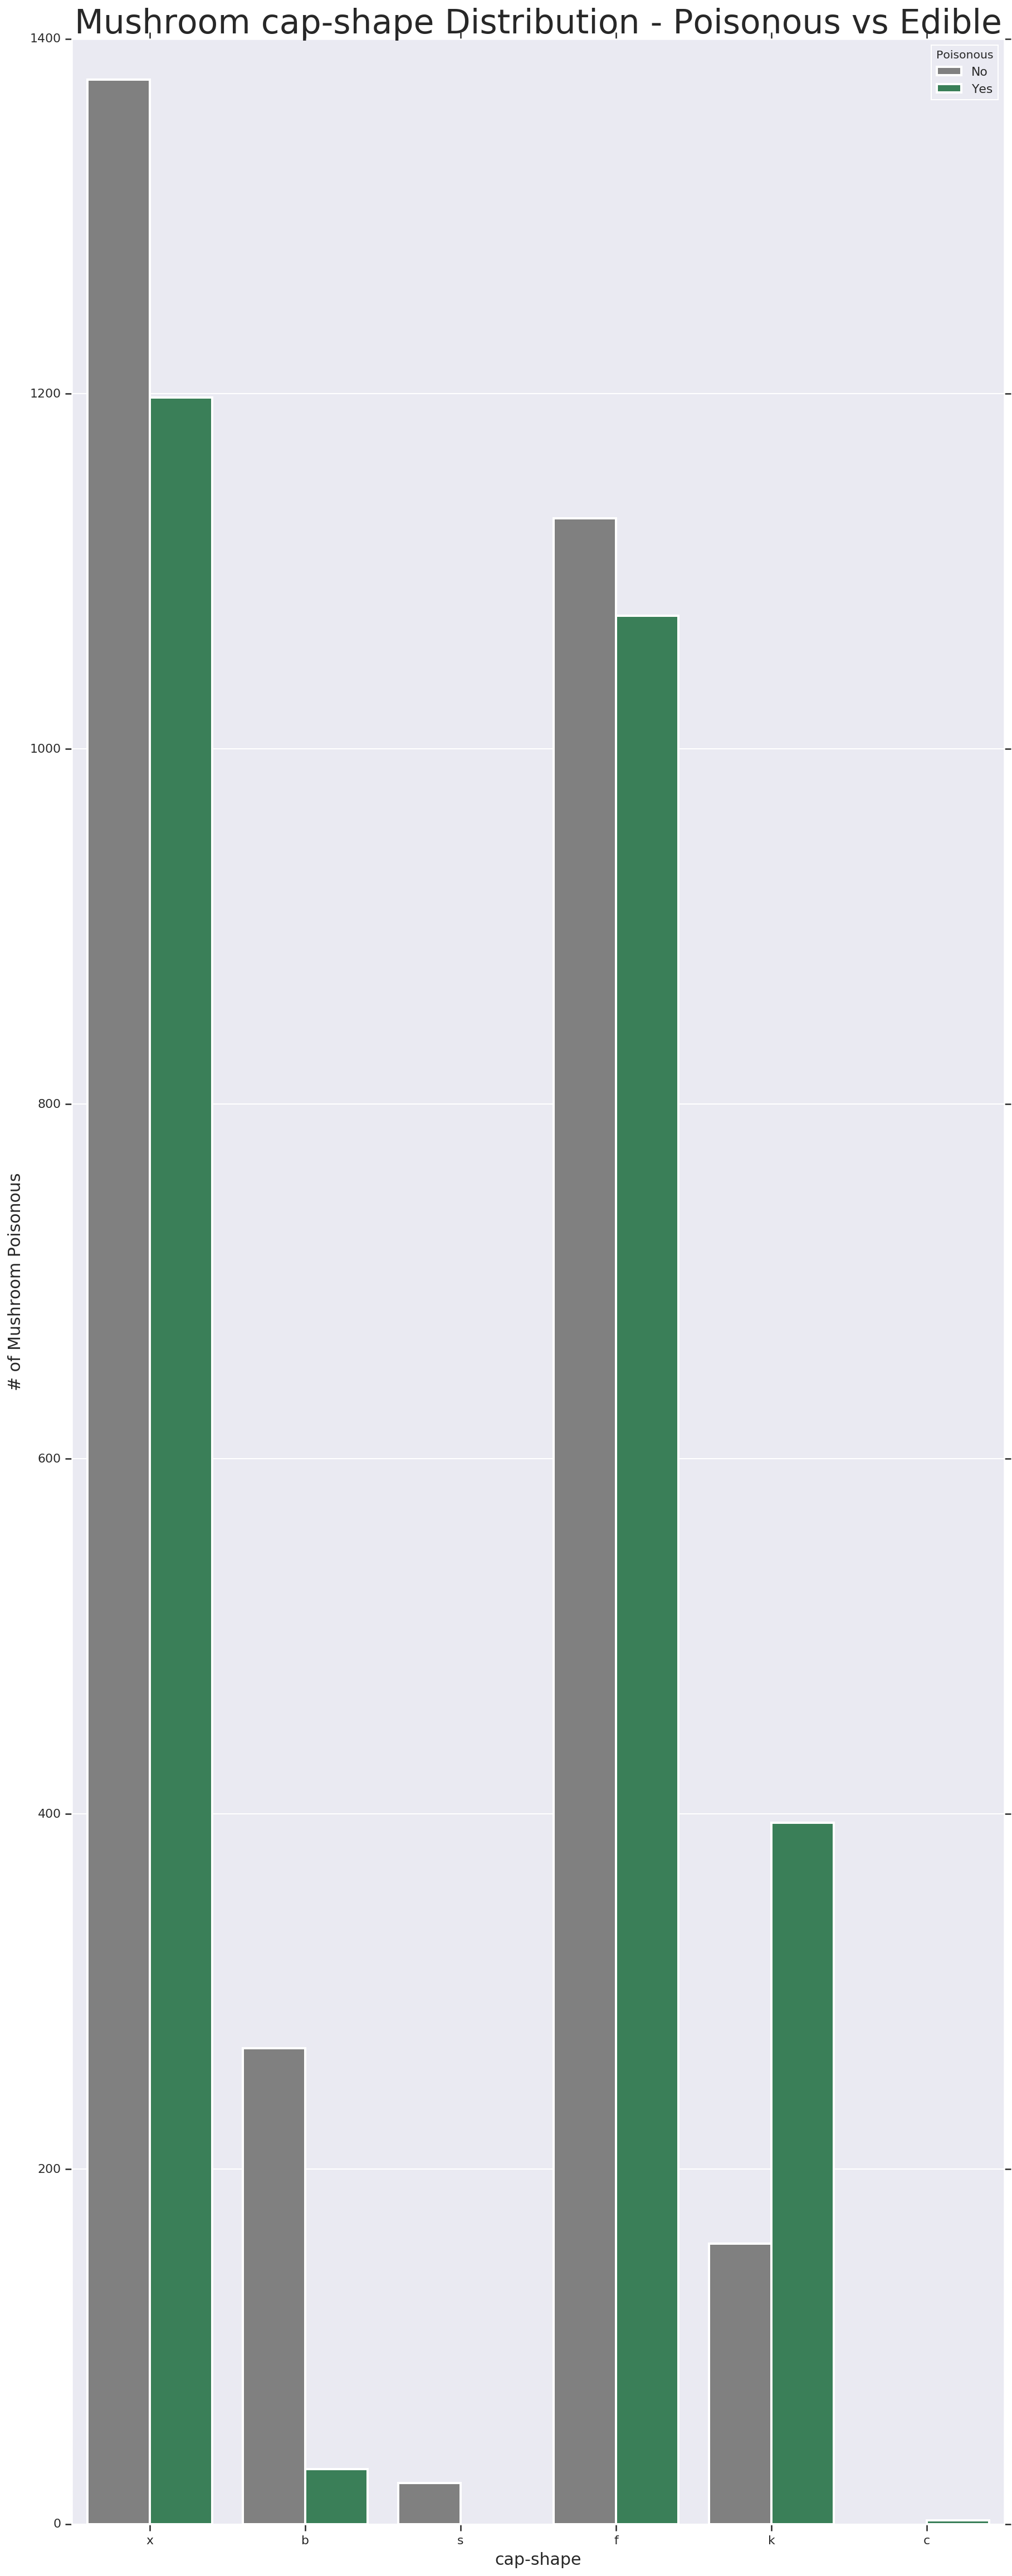

In [160]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,40))
ax = sns.countplot(x = "cap-shape",
                  hue = "class",
                  data = train_copy, 
                   linewidth = 2,
                  palette = pal
)

# Fixing title, xlabel and ylabel
plt.title("Mushroom cap-shape Distribution - Poisonous vs Edible", fontsize = 30)
plt.xlabel("cap-shape", fontsize = 15);
plt.ylabel("# of Mushroom Poisonous", fontsize = 15)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Poisonous")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()


## 3b. cap-surface and class

In [161]:
train['cap-surface'].value_counts()

y    2241
s    1779
f    1633
g       4
Name: cap-surface, dtype: int64

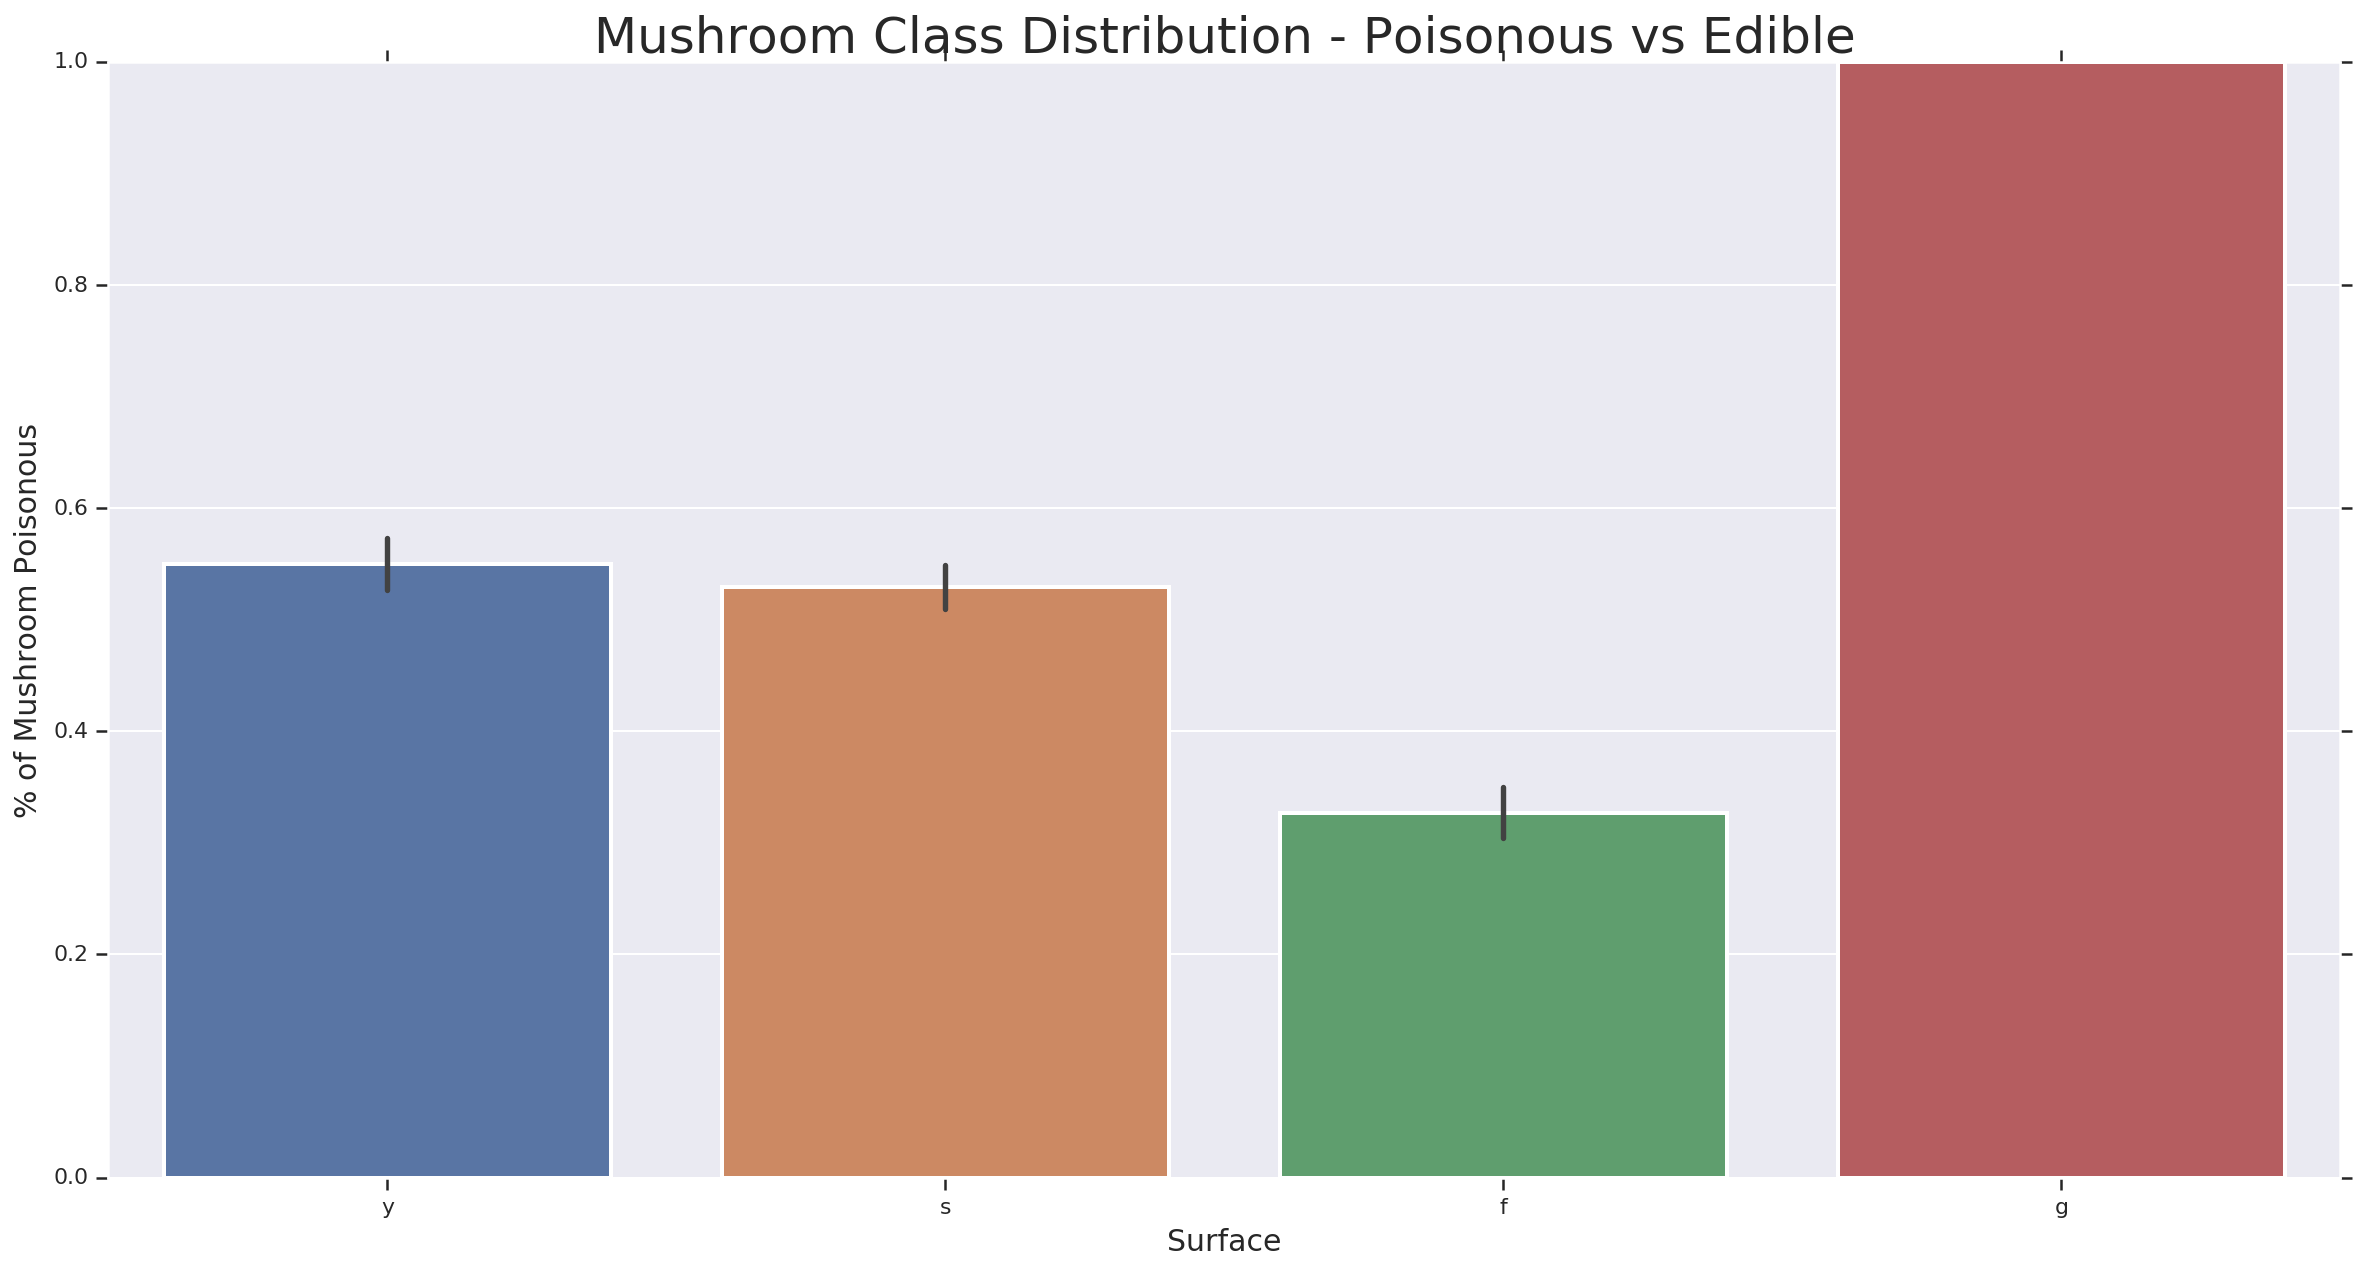

In [162]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "cap-surface", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("Surface", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['y', 's', 'f', 'g']
val = [0, 1, 2, 3]
plt.xticks(val, labels);

It looks like 57% of y, 55% of s, 35% of f and 100% of g are poisonous.

## 3c. cap-color and class

In [163]:
train['cap-color'].value_counts()

n    1592
g    1282
e    1051
y     739
w     731
b     112
p      97
c      30
r      12
u      11
Name: cap-color, dtype: int64

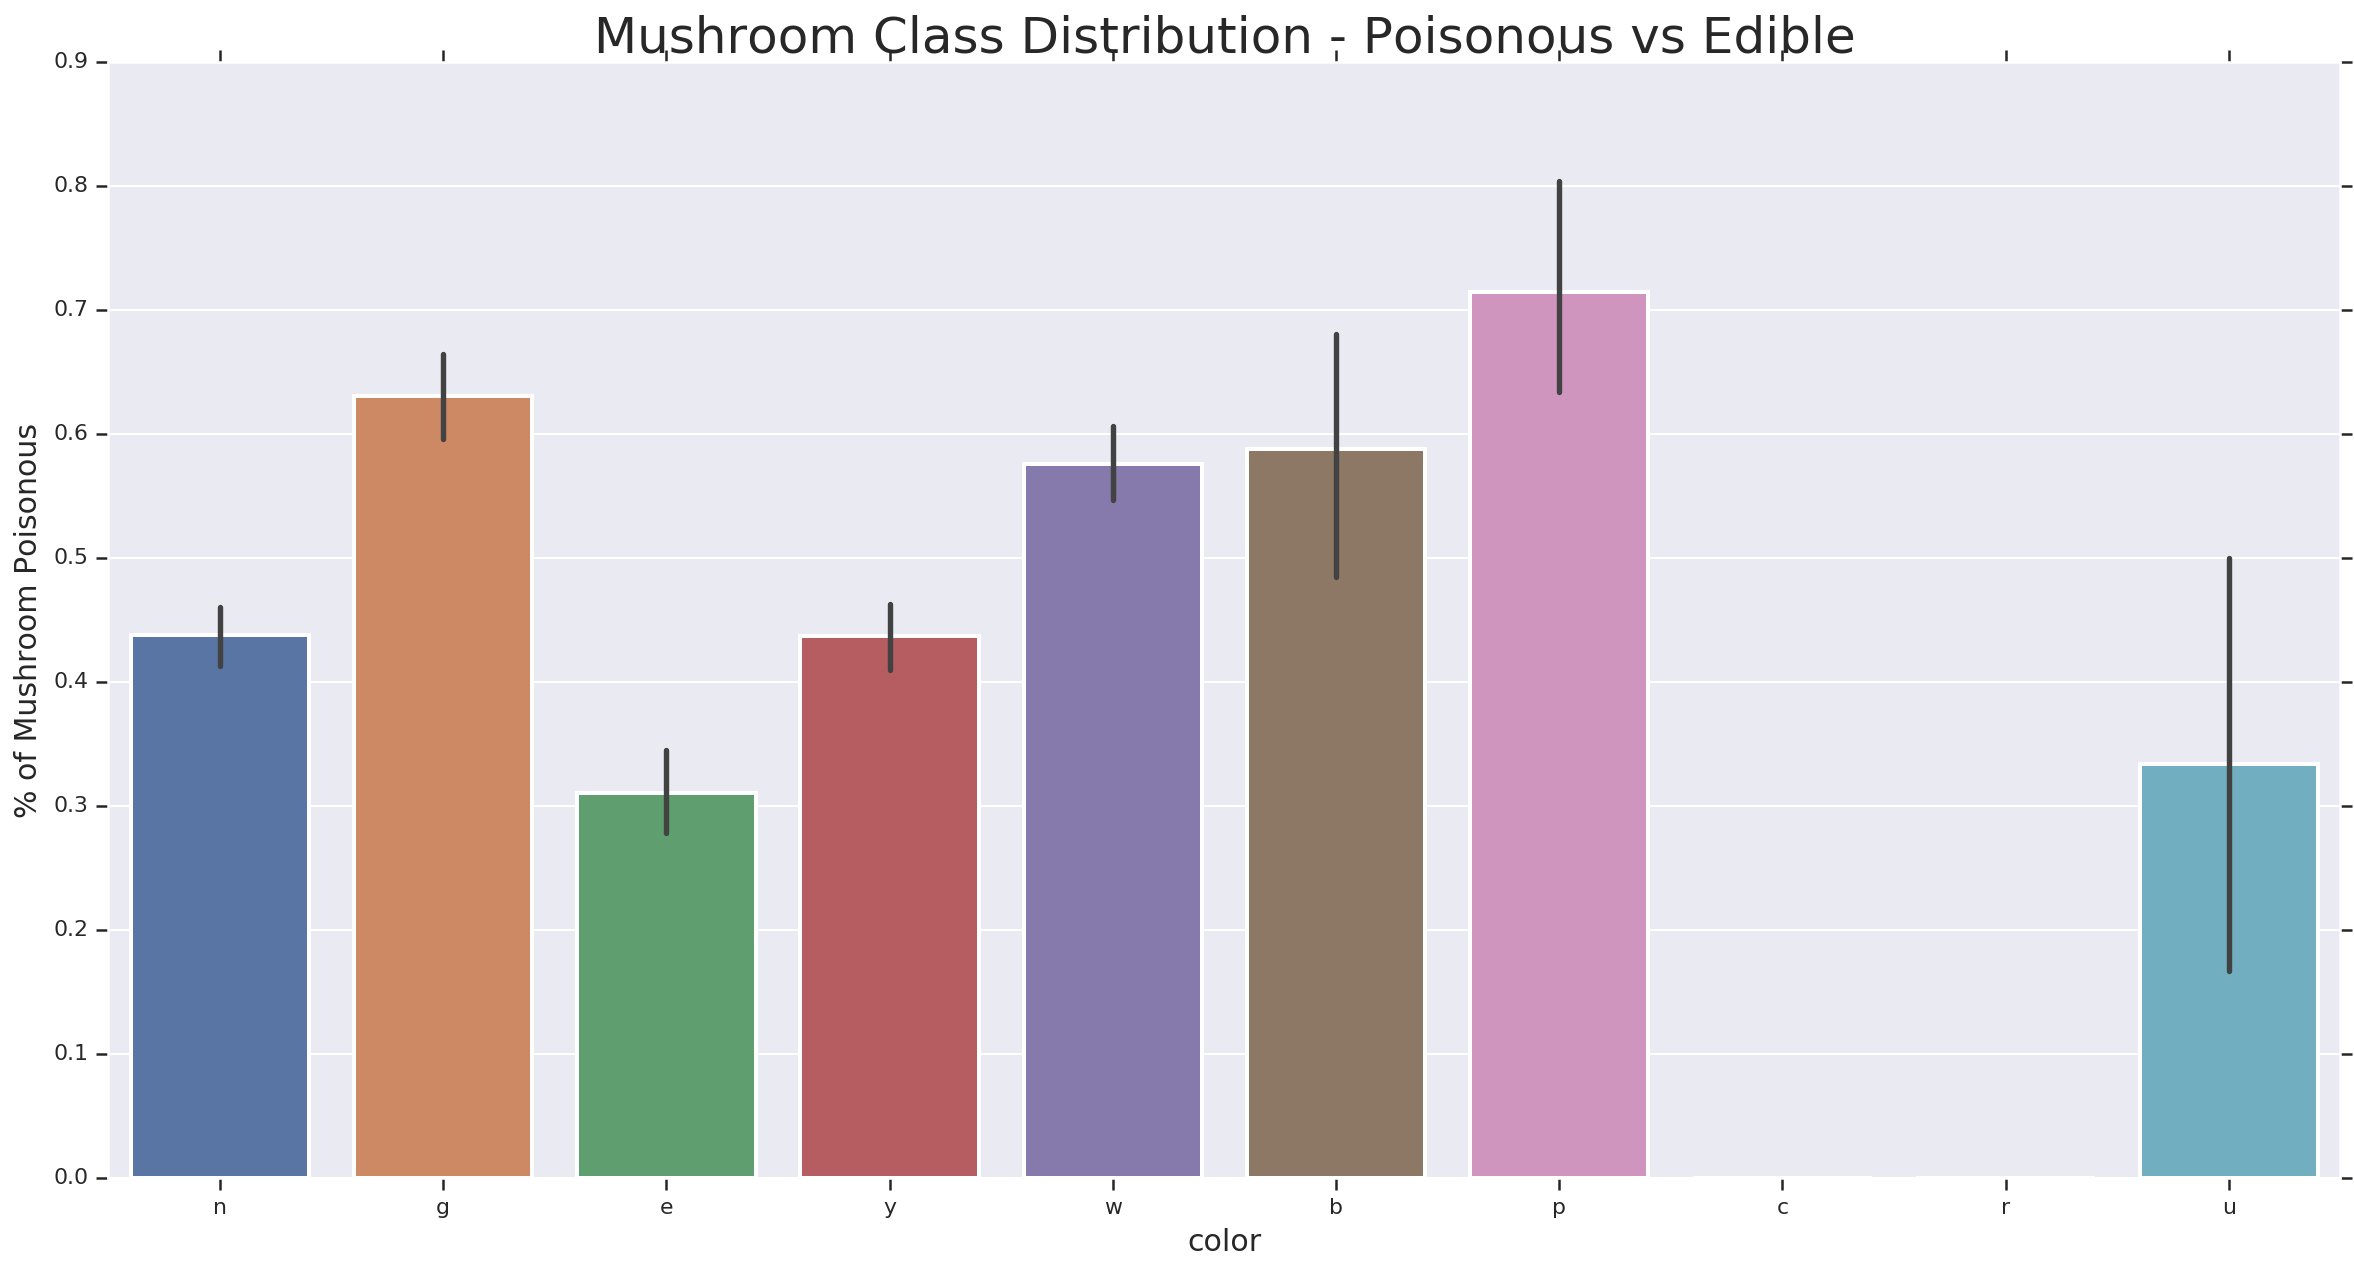

In [164]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "cap-color", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("color", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'r', 'u']
val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.xticks(val, labels);

It looks like 44% of n, 67% of g, 32% of e, 47% of y, 58% of w, 59% of b, 72% of p, none of c, none of r and 35% of u are poisonous.

## 3d. bruises and class

In [165]:
train['bruises'].value_counts()

f    3293
t    2364
Name: bruises, dtype: int64

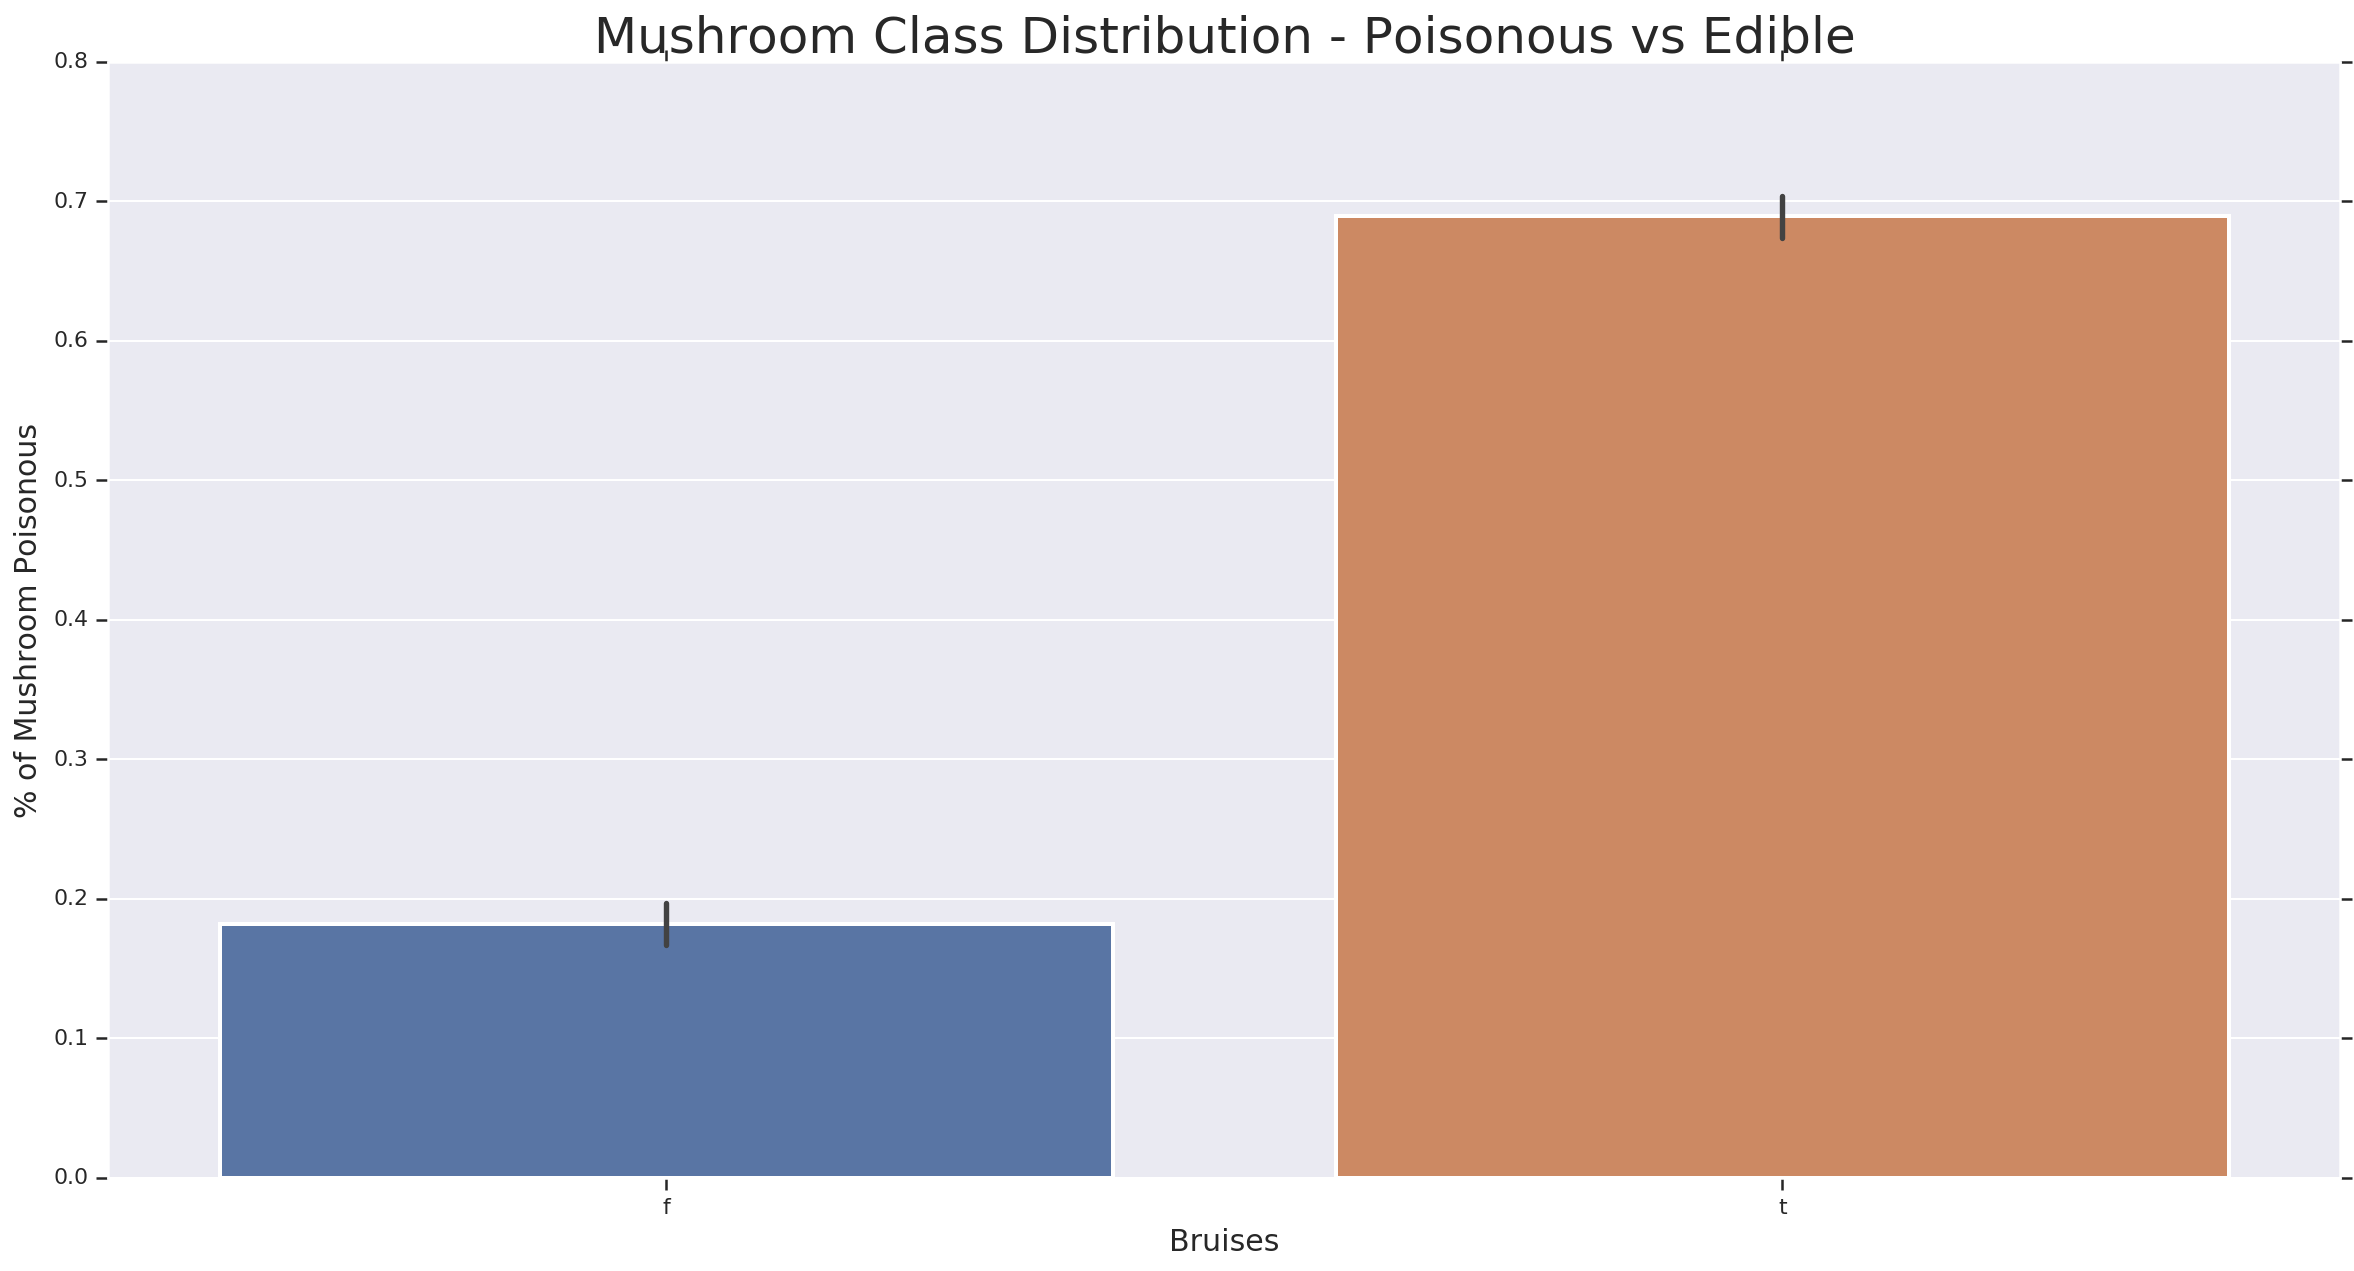

In [166]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "bruises", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("Bruises", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['f','t']
val = [0, 1]
plt.xticks(val, labels);

From the barplot, 18% of f and 79% of t are poisonous.

## 3e. odor and class

In [167]:
train['odor'].value_counts()

n    2482
f    1522
y     388
s     383
l     289
a     270
p     174
c     124
m      25
Name: odor, dtype: int64

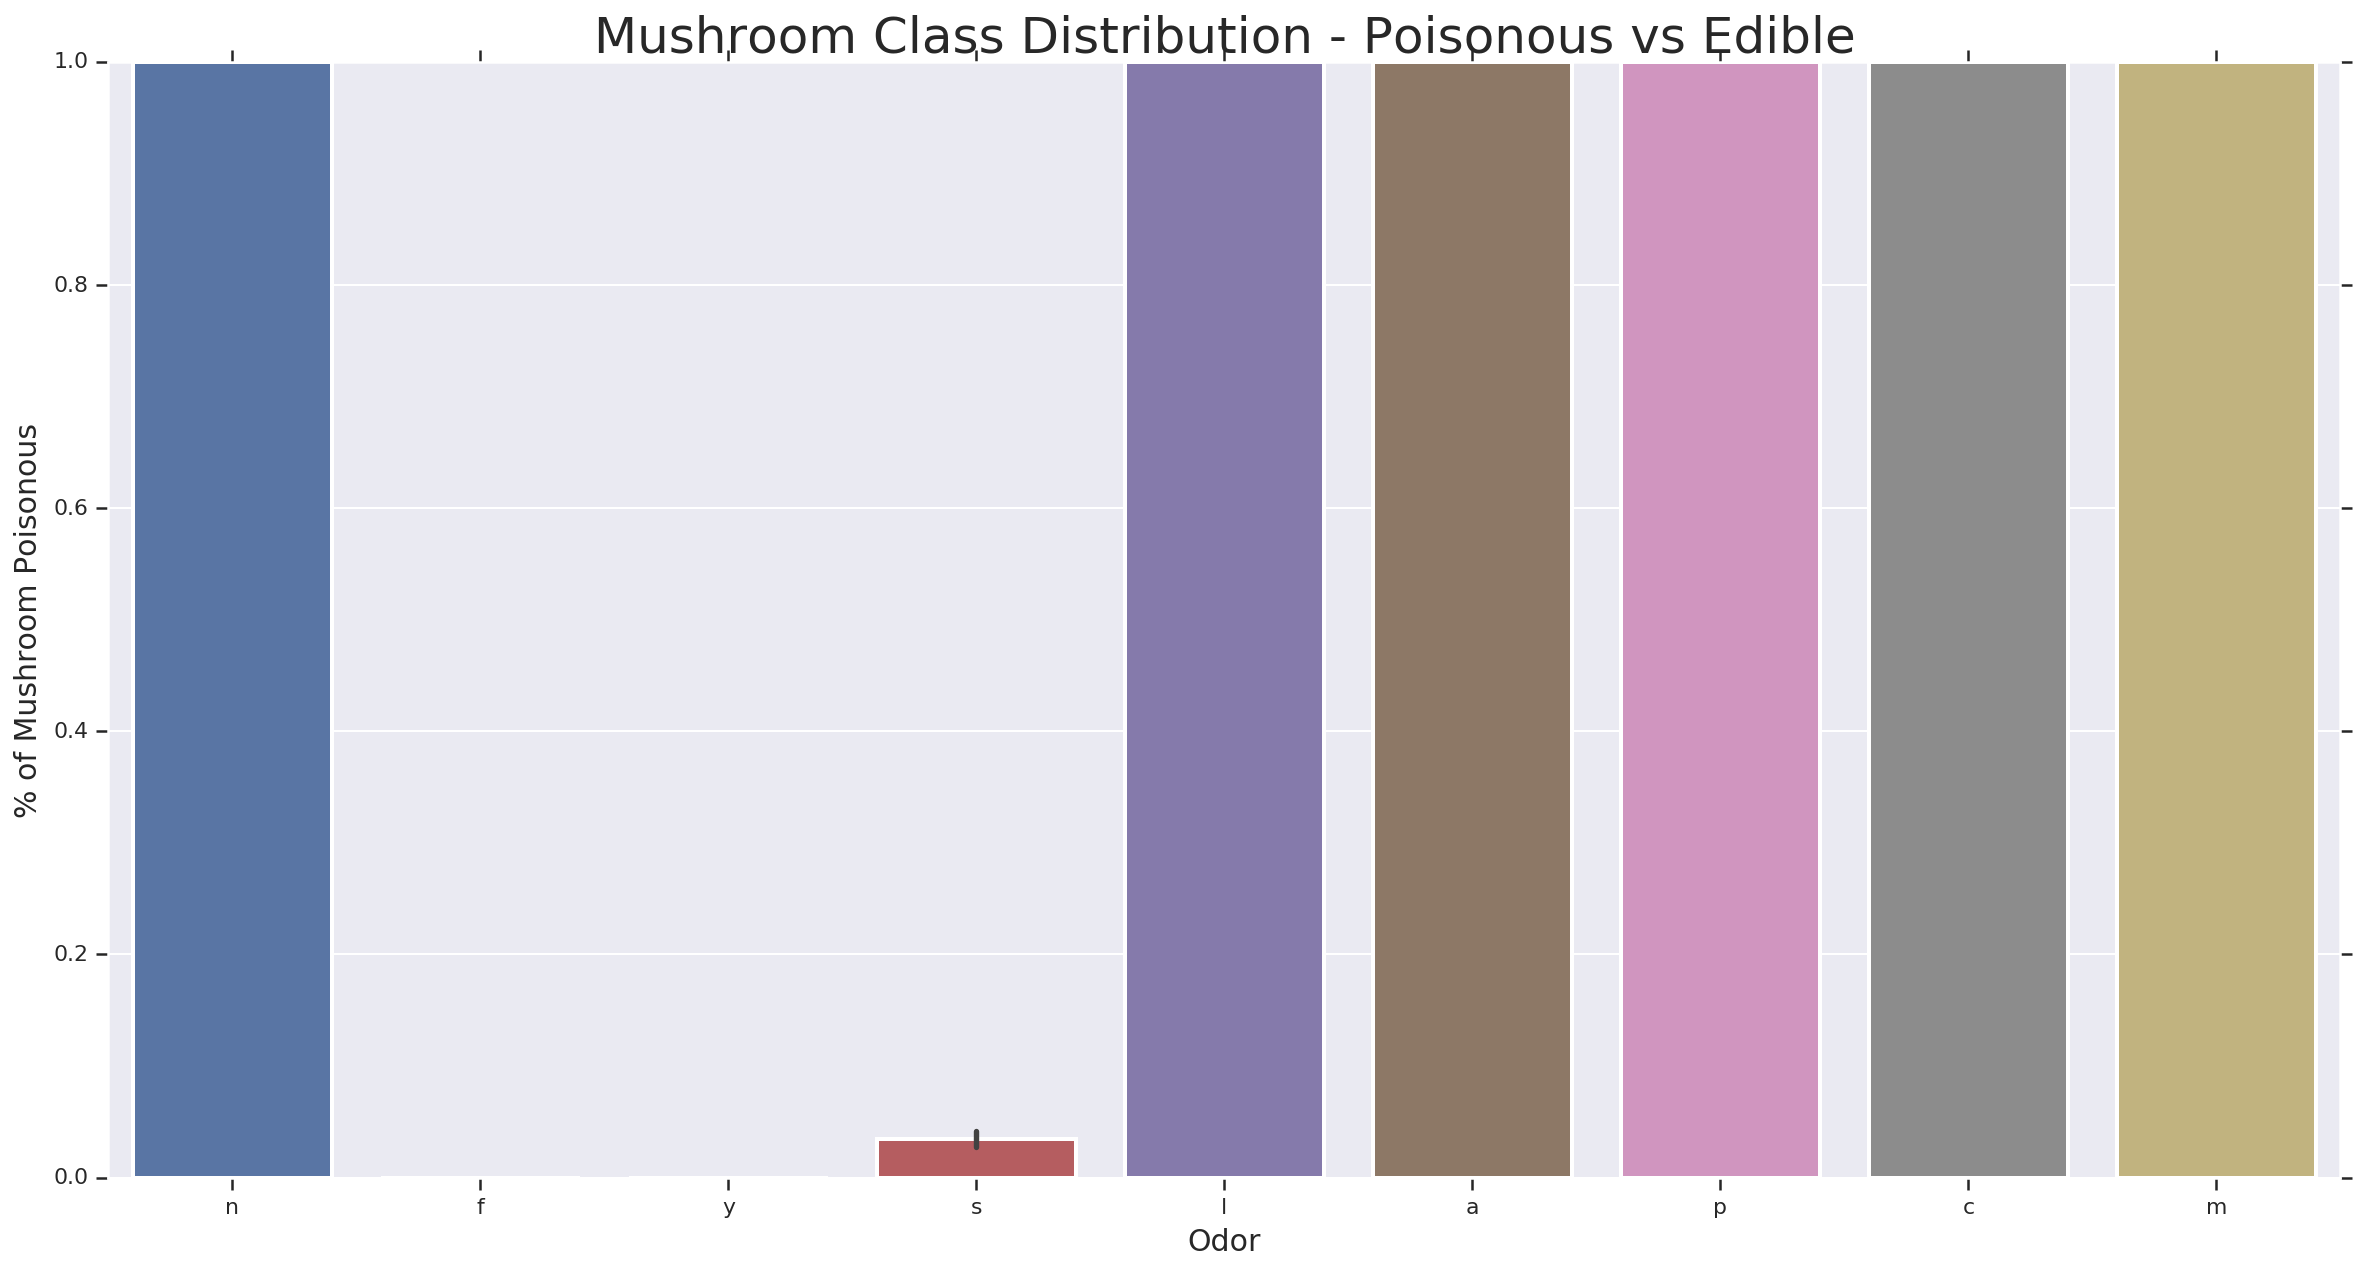

In [168]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "odor", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("Odor", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['n','f', 'y', 's', 'l', 'a', 'p', 'c', 'm']
val = [0, 1, 2, 3, 4, 5, 6, 7, 8]
plt.xticks(val, labels);

n, l, a, p, c and m are all poisonous, f and y are all edible.

#### We decide not to use the feature 'odor', as most of the categories of the features skewed seriously.

## 3f. gill-attachment, gill-spacing, gill-size, gill-color and class

In [169]:
train["gill-attachment"].value_counts()

f    5515
a     142
Name: gill-attachment, dtype: int64

In [170]:
train["gill-spacing"].value_counts()

c    4735
w     922
Name: gill-spacing, dtype: int64

In [171]:
train["gill-size"].value_counts()

b    3926
n    1731
Name: gill-size, dtype: int64

In [172]:
train["gill-color"].value_counts()

b    1190
p    1043
w     811
n     741
g     521
h     520
u     352
k     291
e      75
y      53
o      44
r      16
Name: gill-color, dtype: int64

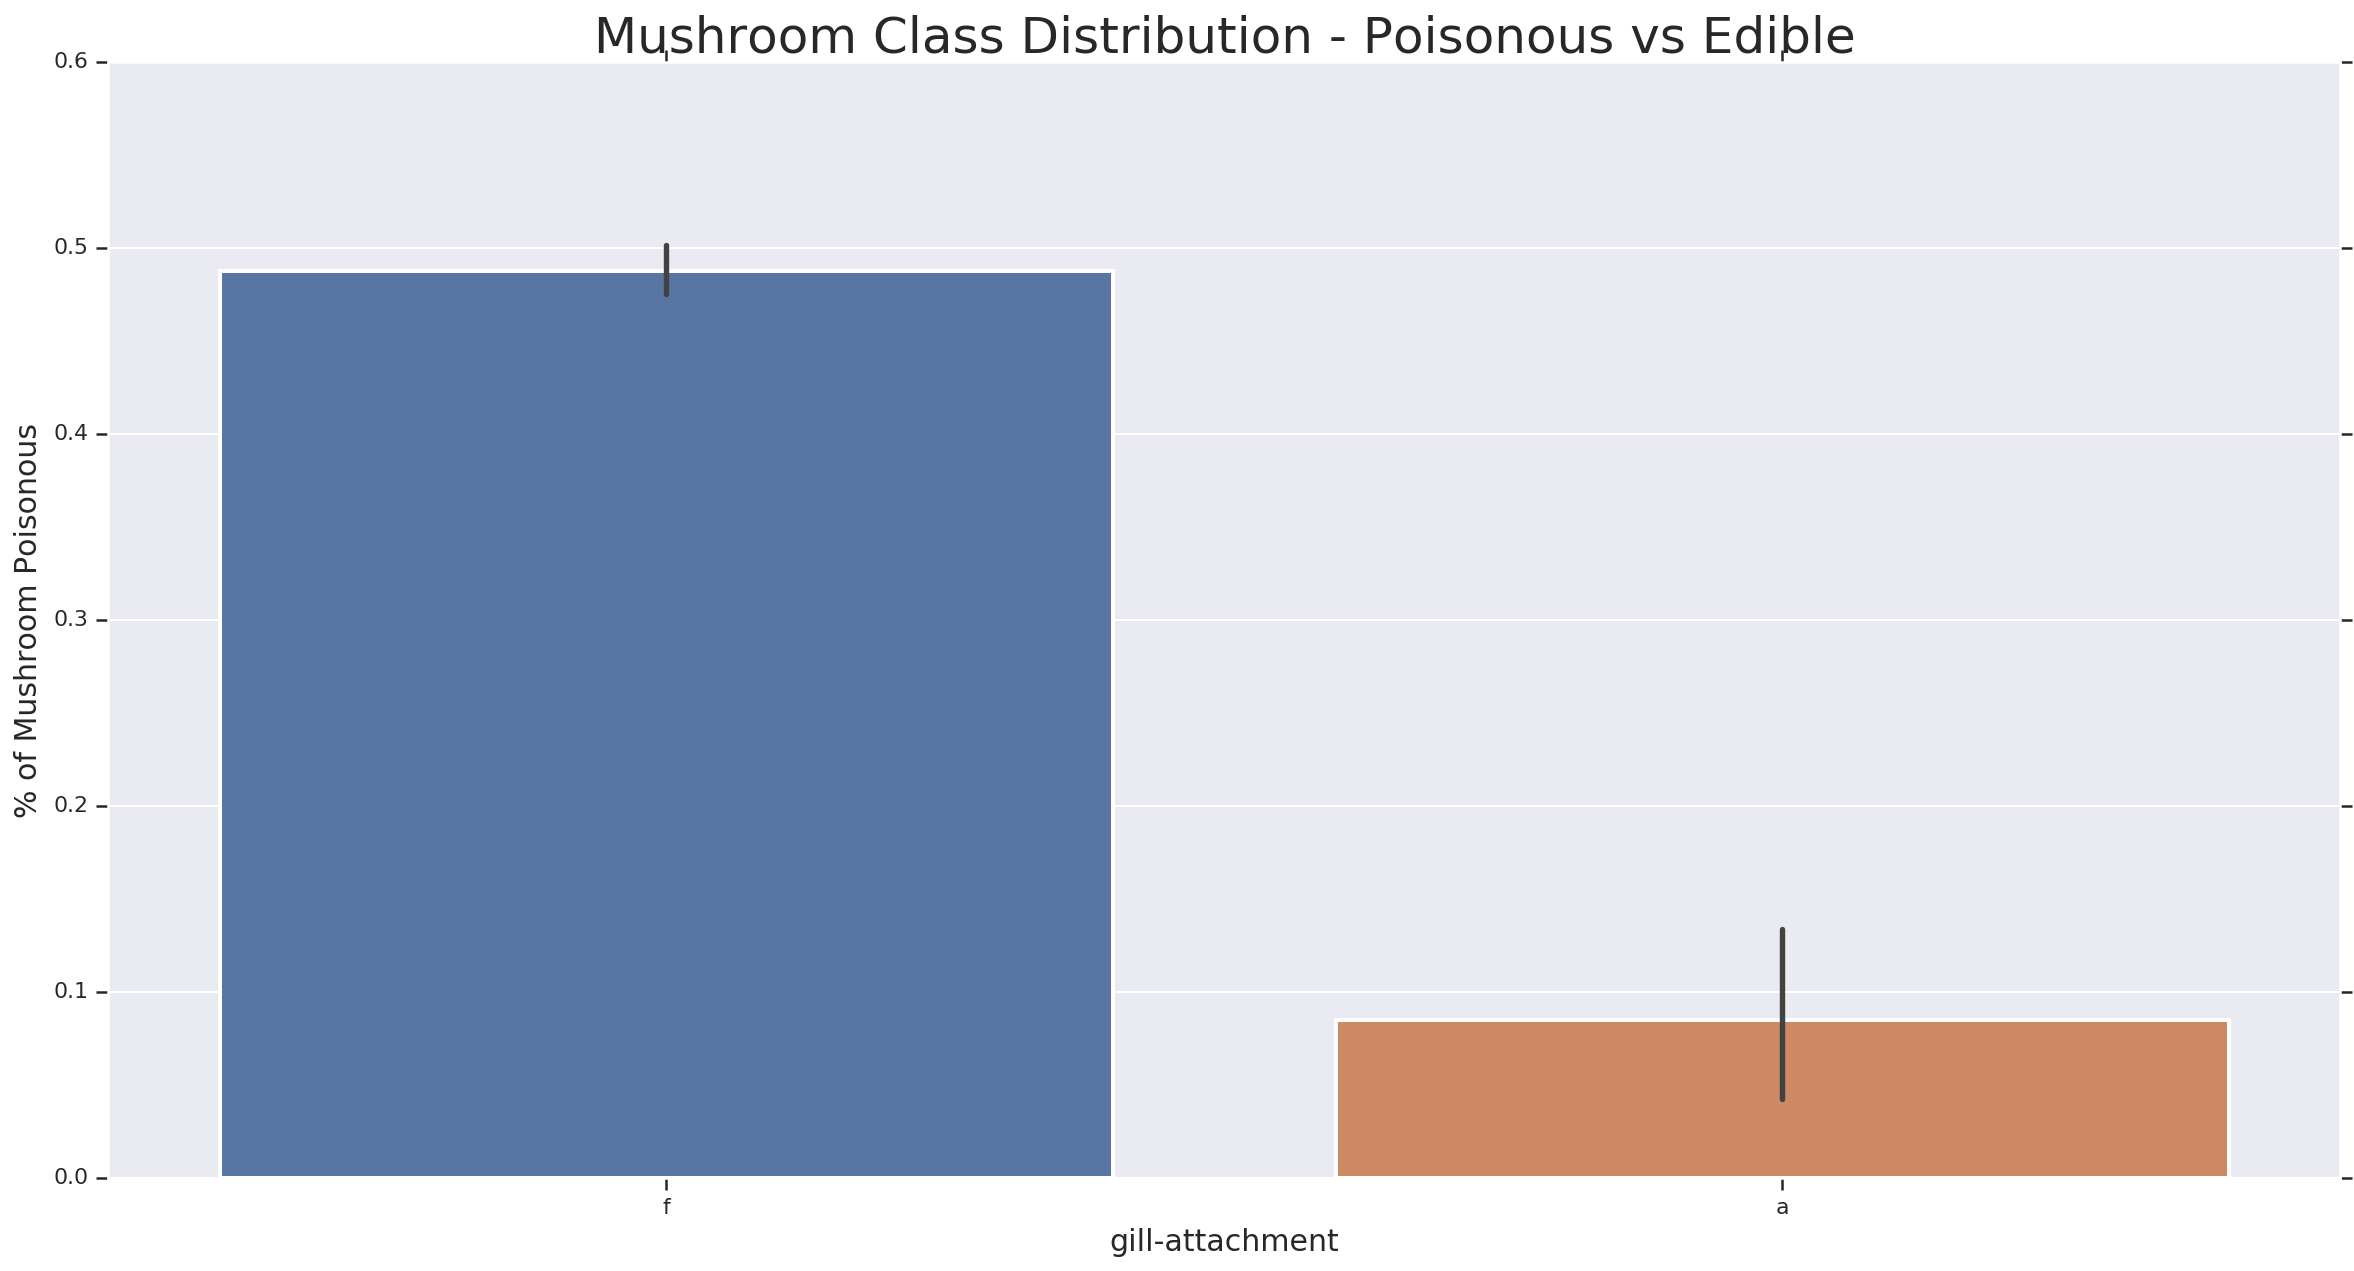

In [173]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "gill-attachment", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("gill-attachment", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['f', 'a']
val = [0, 1]
plt.xticks(val, labels);

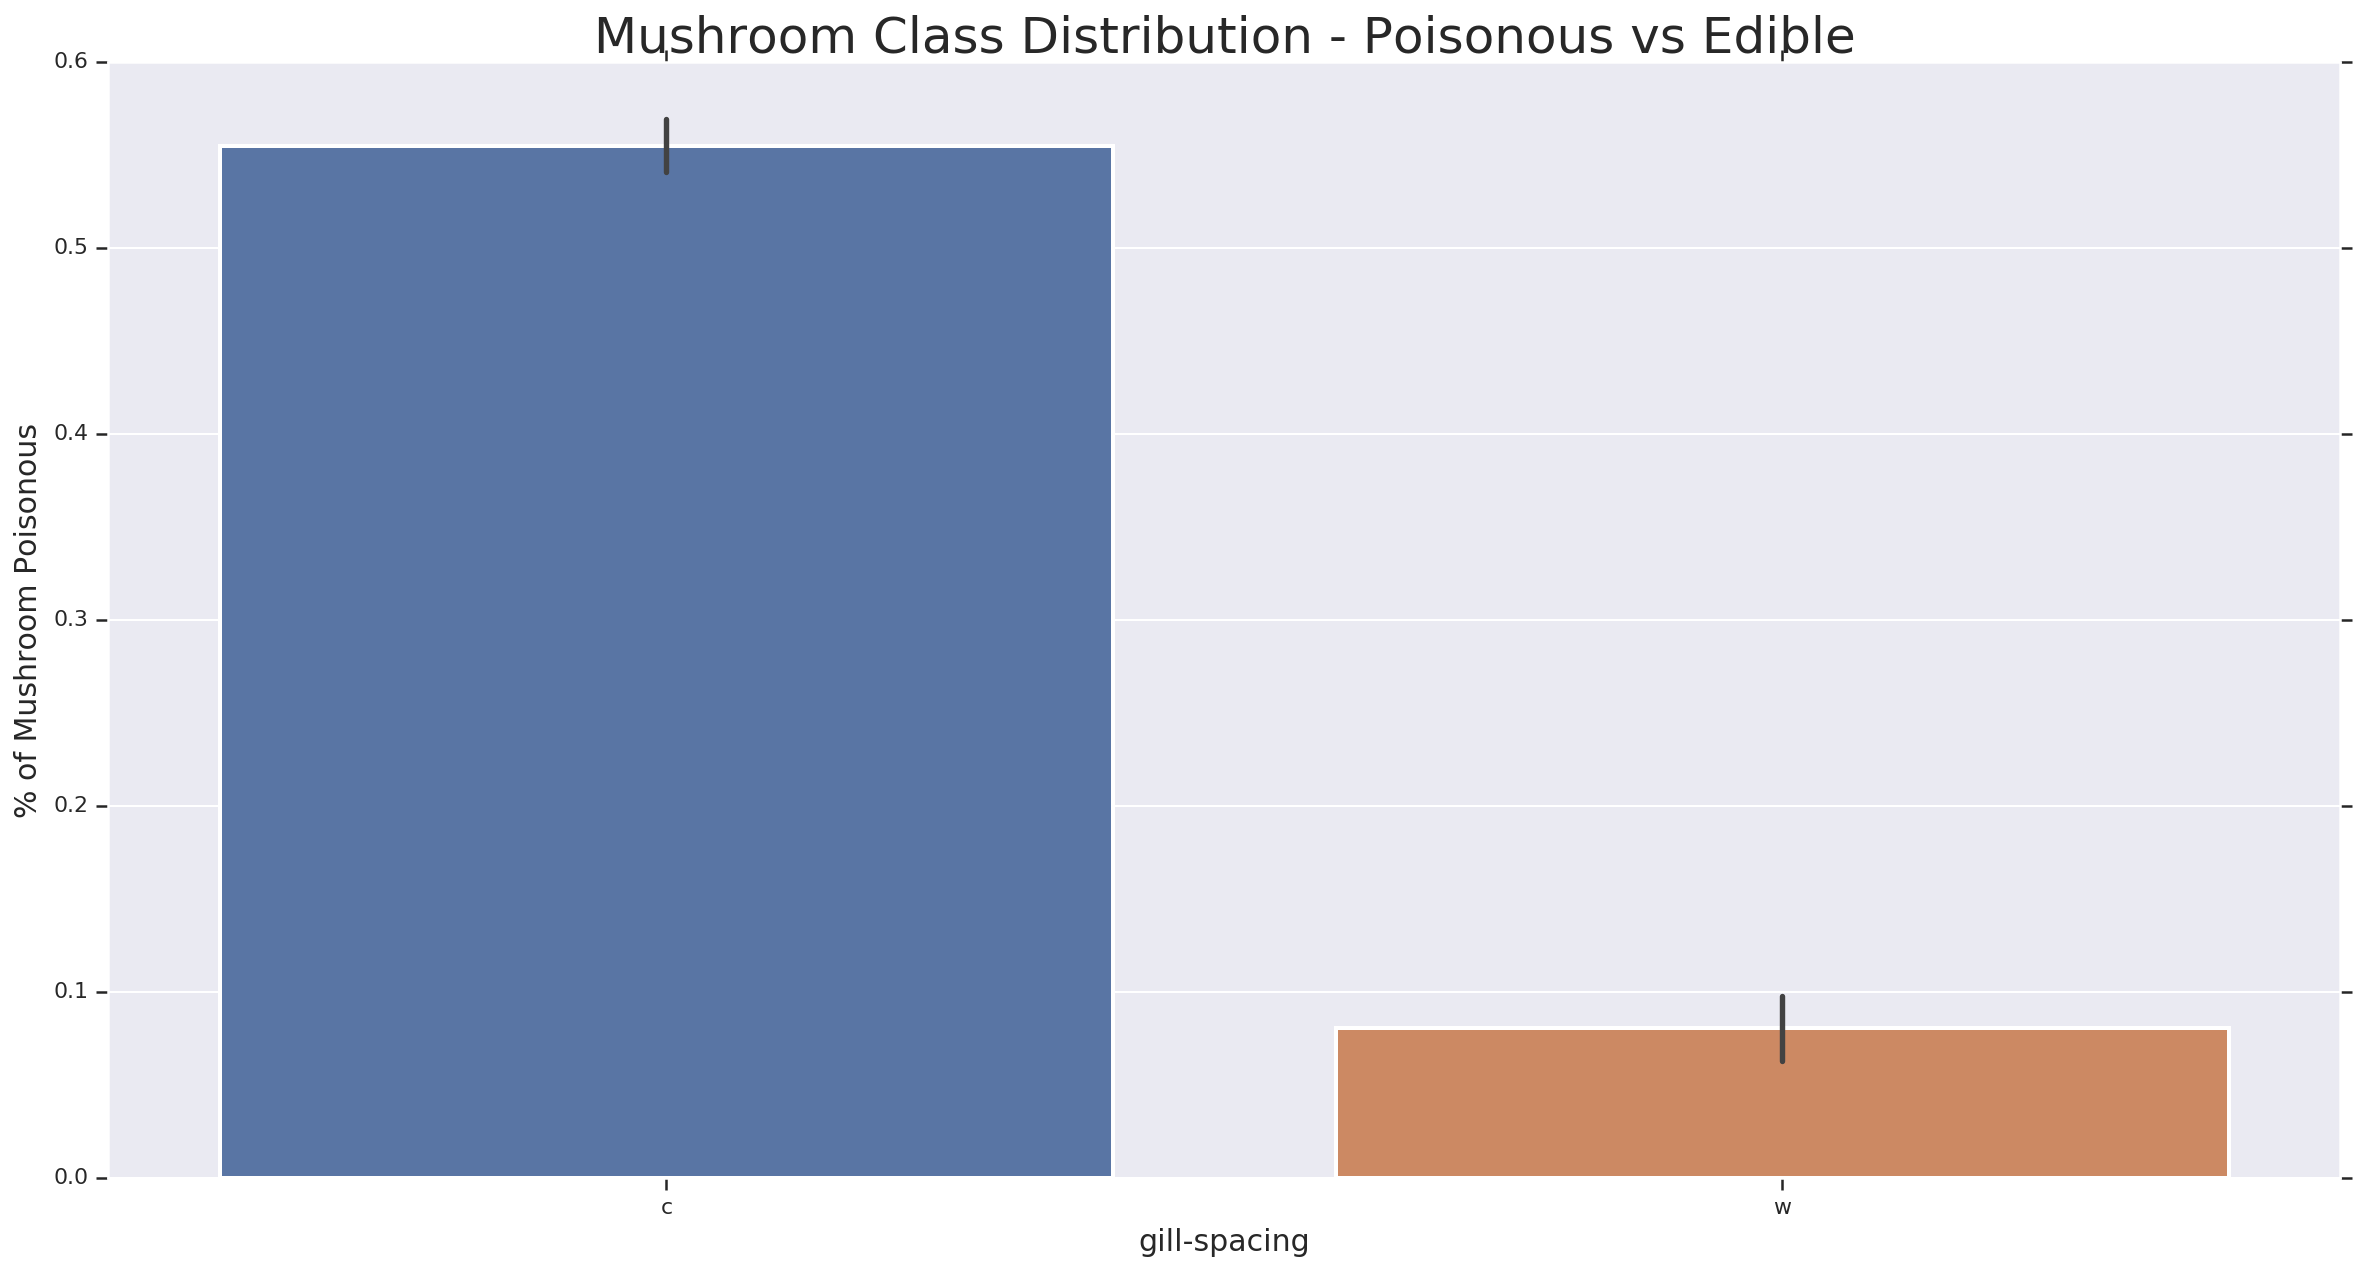

In [174]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "gill-spacing", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("gill-spacing", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['c', 'w']
val = [0, 1]
plt.xticks(val, labels);

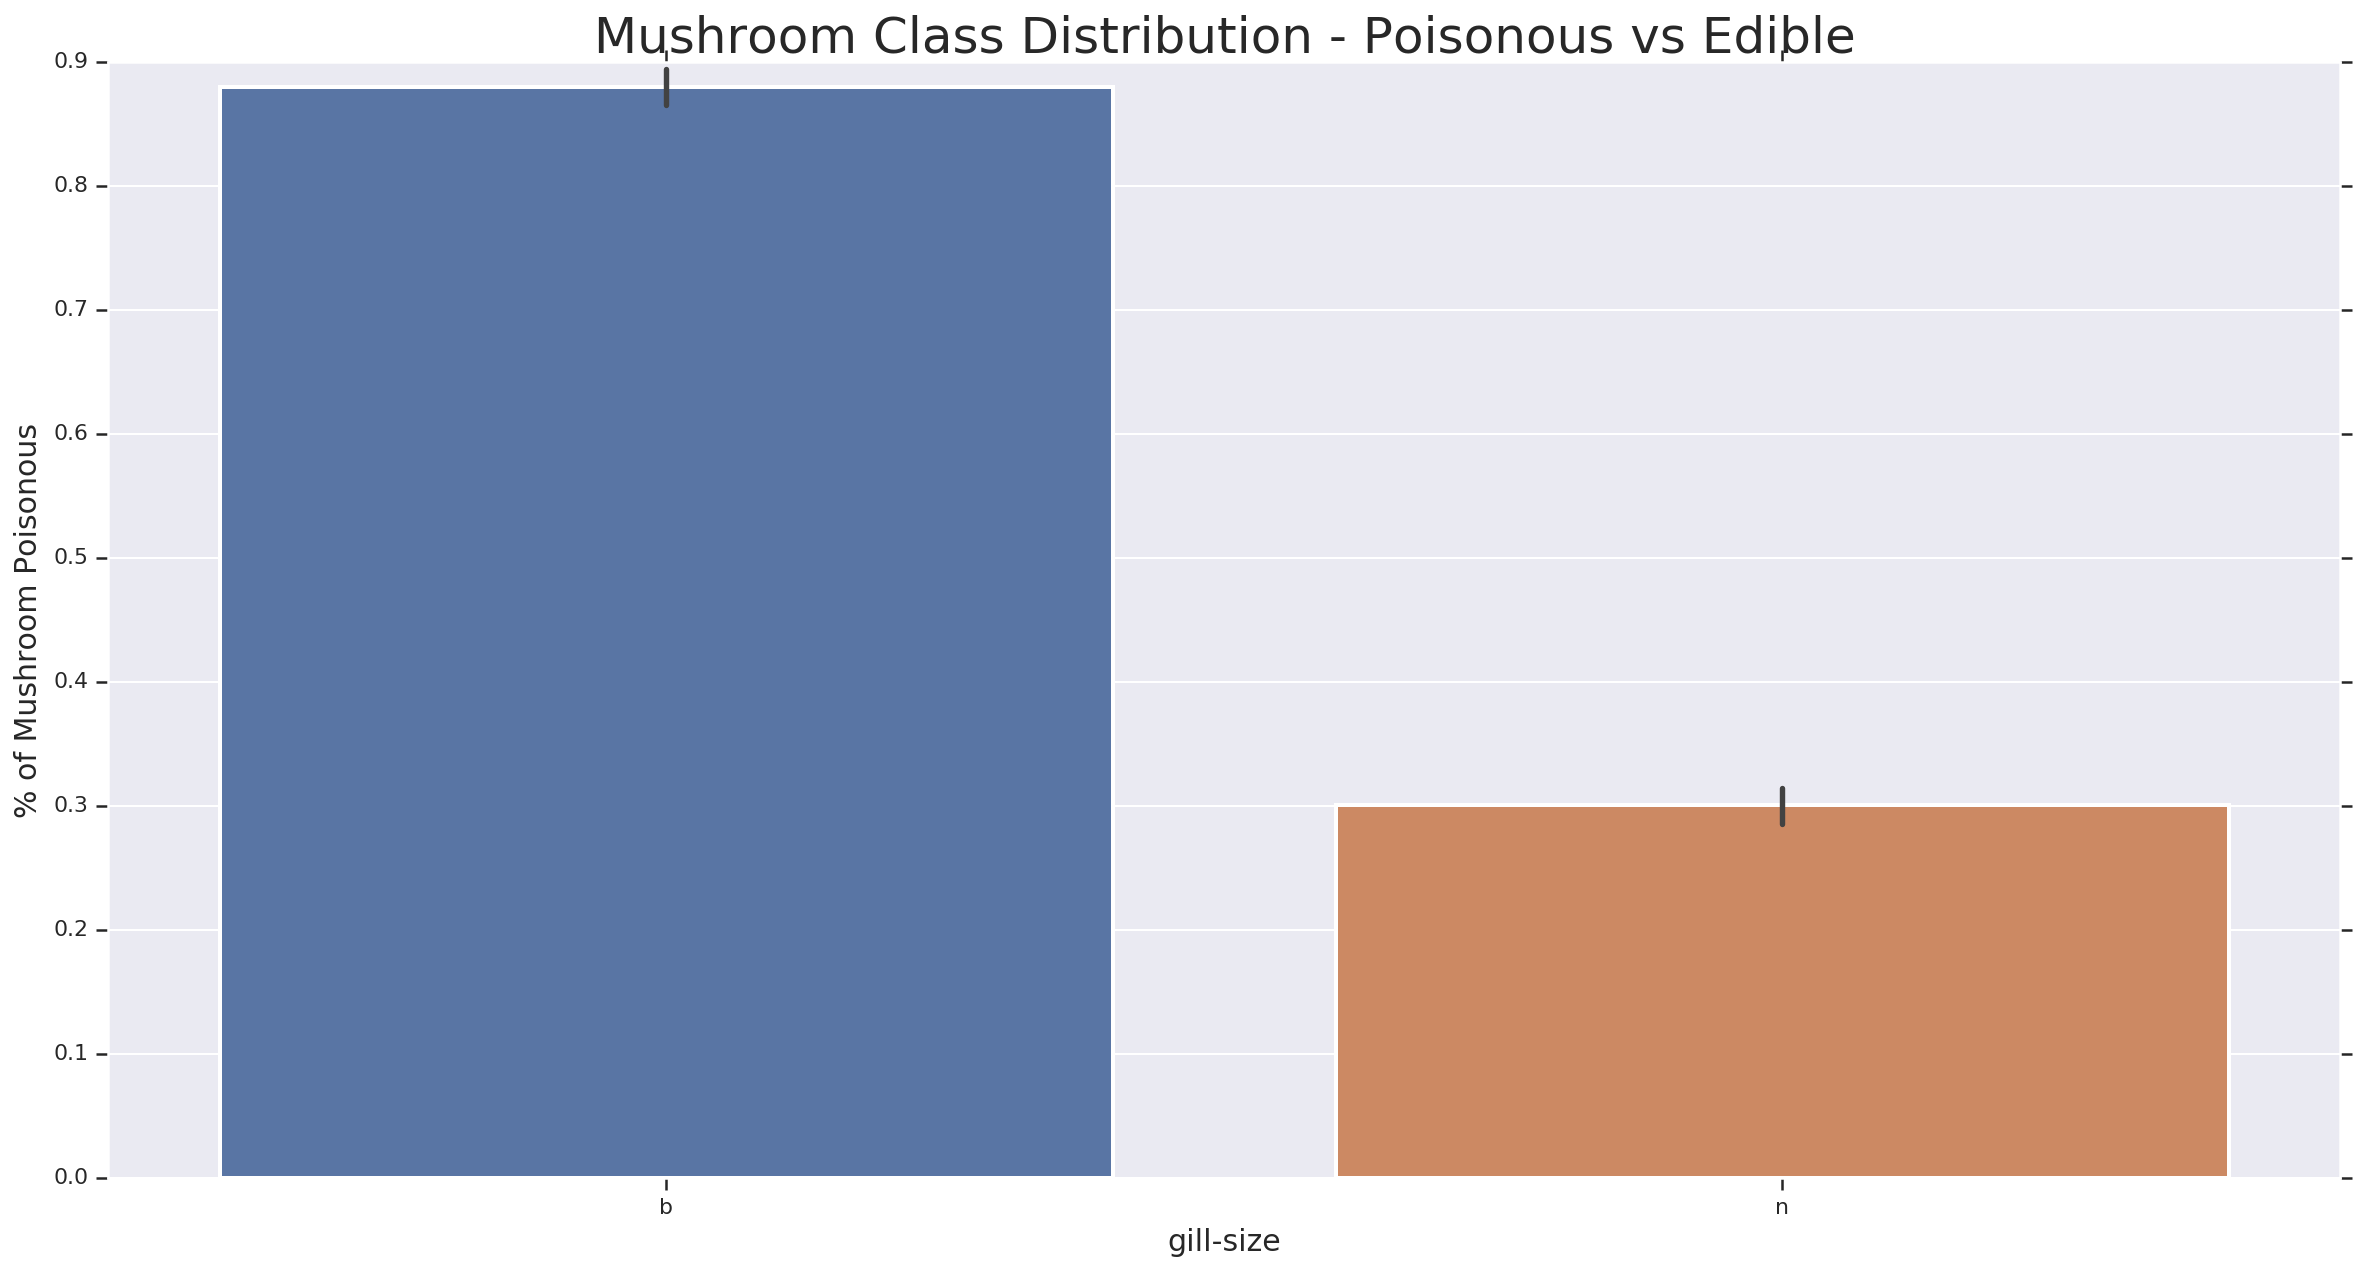

In [175]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "gill-size", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("gill-size", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['b', 'n']
val = [0, 1]
plt.xticks(val, labels);

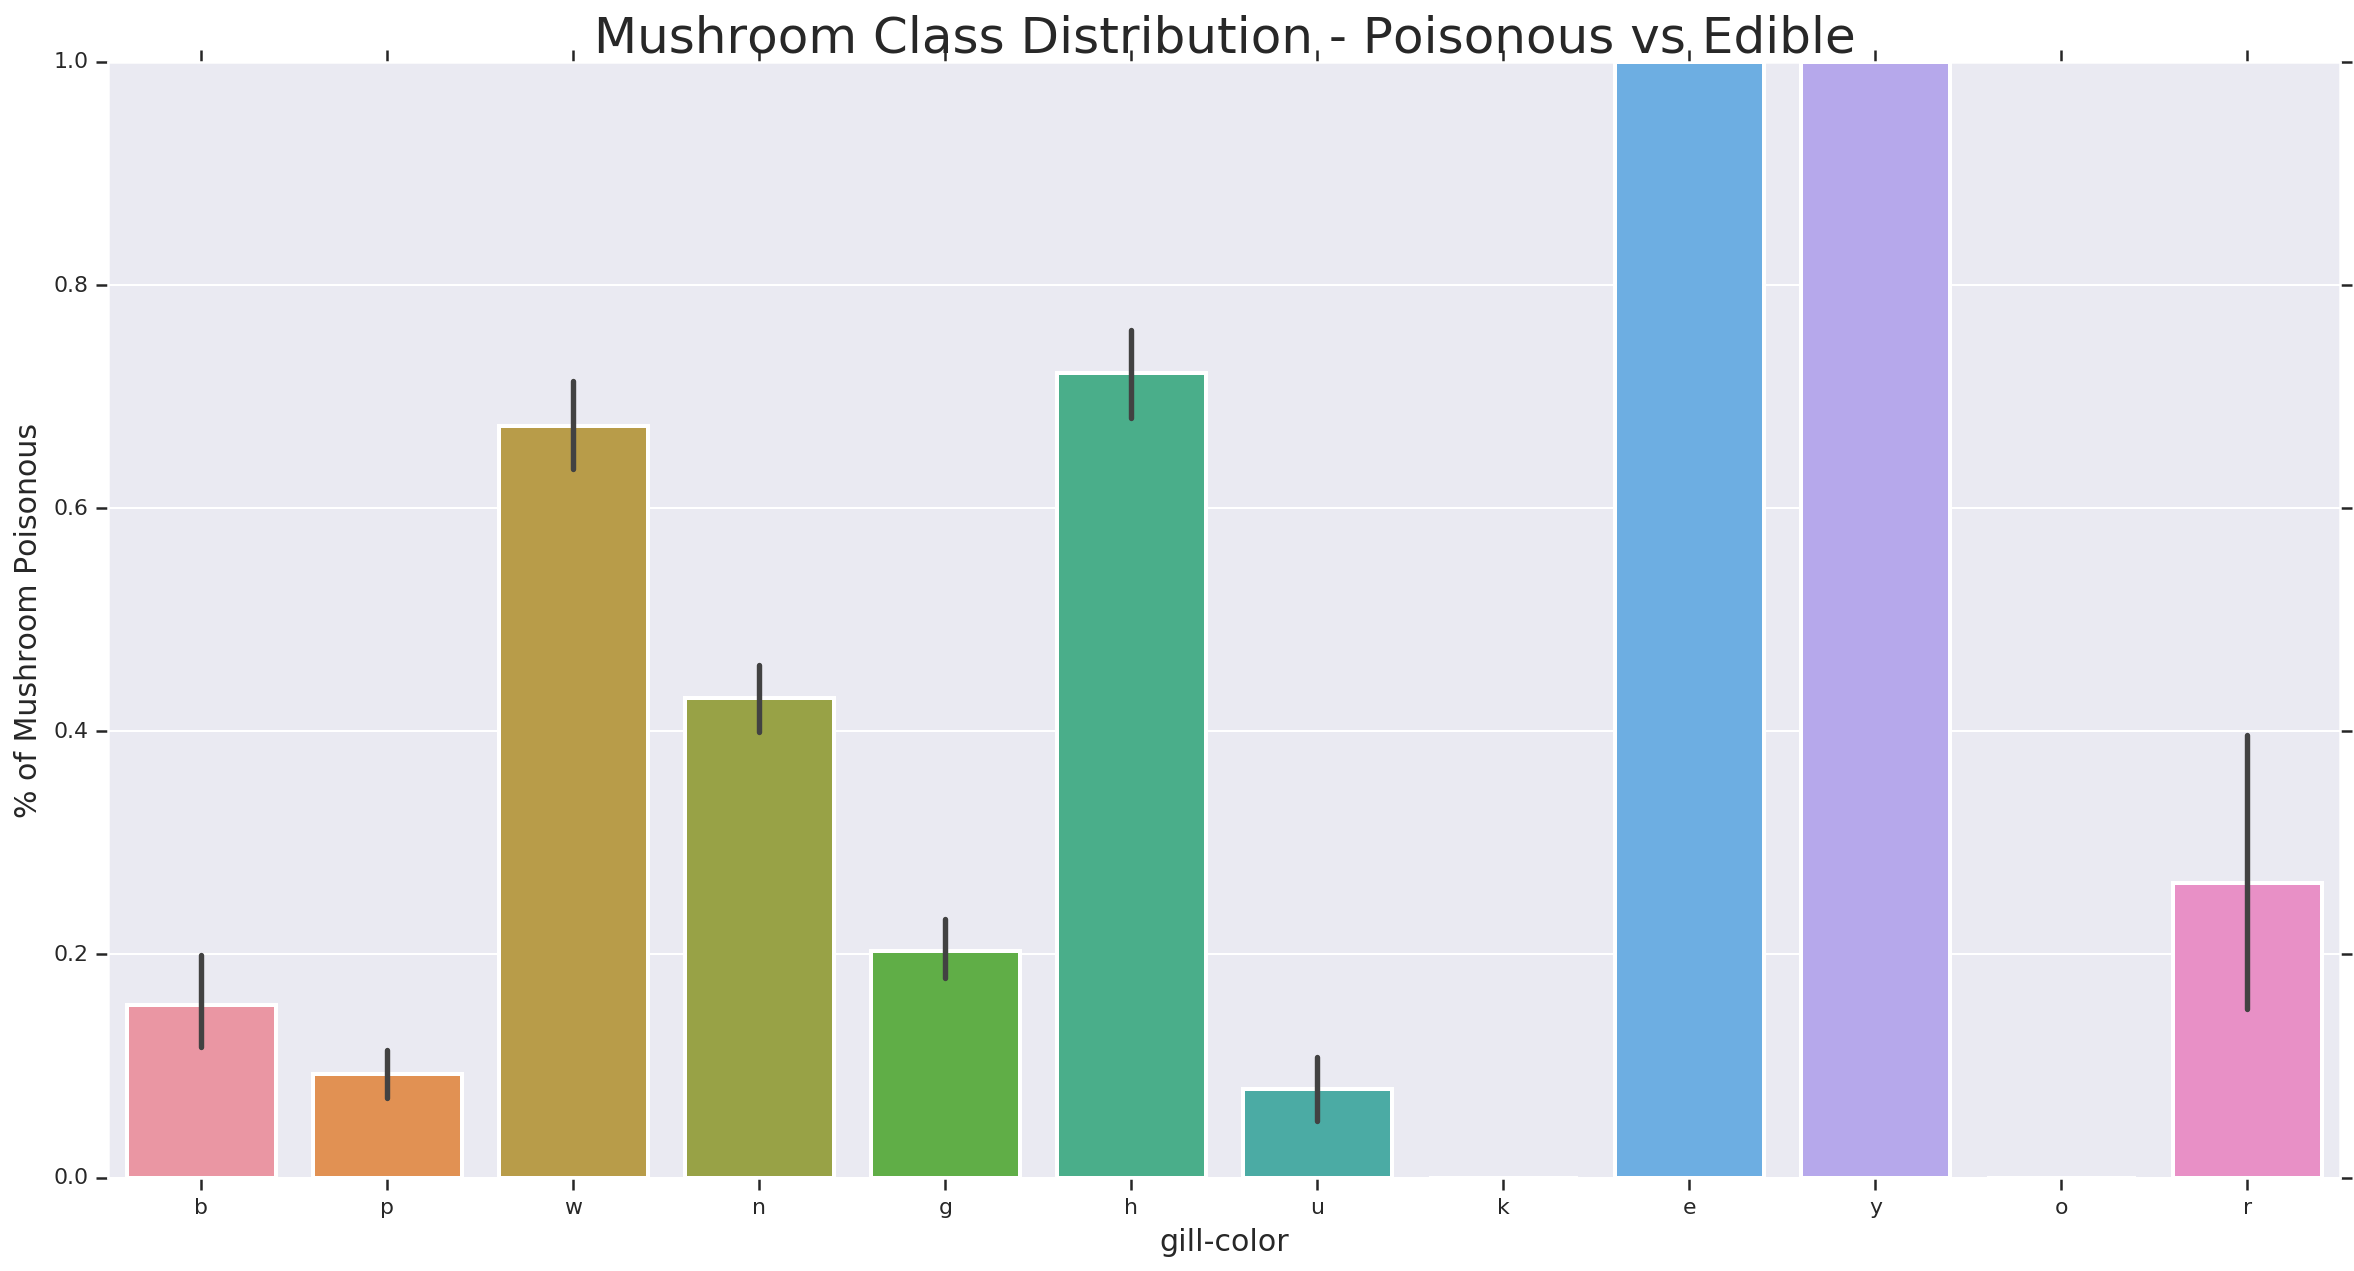

In [176]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "gill-color", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("gill-color", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['b', 'p', 'w', 'n', 'g', 'h', 'u', 'k', 'e', 'y', 'o', 'r']
val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.xticks(val, labels);

In [177]:
train["stalk-shape"].value_counts()

t    3230
e    2427
Name: stalk-shape, dtype: int64

In [178]:
train["stalk-surface-above-ring"].value_counts()

s    3614
k    1645
f     381
y      17
Name: stalk-surface-above-ring, dtype: int64

In [179]:
train["stalk-surface-below-ring"].value_counts()

s    3439
k    1600
f     416
y     202
Name: stalk-surface-below-ring, dtype: int64

In [180]:
train["stalk-color-above-ring"].value_counts()

w    3088
p    1296
g     418
n     311
b     310
o     130
e      74
c      25
y       5
Name: stalk-color-above-ring, dtype: int64

In [181]:
train["stalk-color-below-ring"].value_counts()

w    3040
p    1307
g     403
n     356
b     311
o     130
e      68
c      25
y      17
Name: stalk-color-below-ring, dtype: int64

In [182]:
train["veil-type"].value_counts()

p    5657
Name: veil-type, dtype: int64

##### veil-type can be deleted

In [183]:
train["veil-color"].value_counts()

w    5522
n      67
o      63
y       5
Name: veil-color, dtype: int64

In [184]:
train["ring-number"].value_counts()

o    5219
t     413
n      25
Name: ring-number, dtype: int64

In [185]:
train["ring-type"].value_counts()

p    2755
e    1938
l     905
f      34
n      25
Name: ring-type, dtype: int64

In [186]:
train["spore-print-color"].value_counts()

w    1642
n    1398
k    1296
h    1137
r      51
o      37
u      35
b      32
y      29
Name: spore-print-color, dtype: int64

In [187]:
train["population"].value_counts()

v    2817
y    1191
s     872
n     274
a     265
c     238
Name: population, dtype: int64

In [188]:
train["habitat"].value_counts()

d    2219
g    1497
p     779
l     562
u     260
m     201
w     139
Name: habitat, dtype: int64

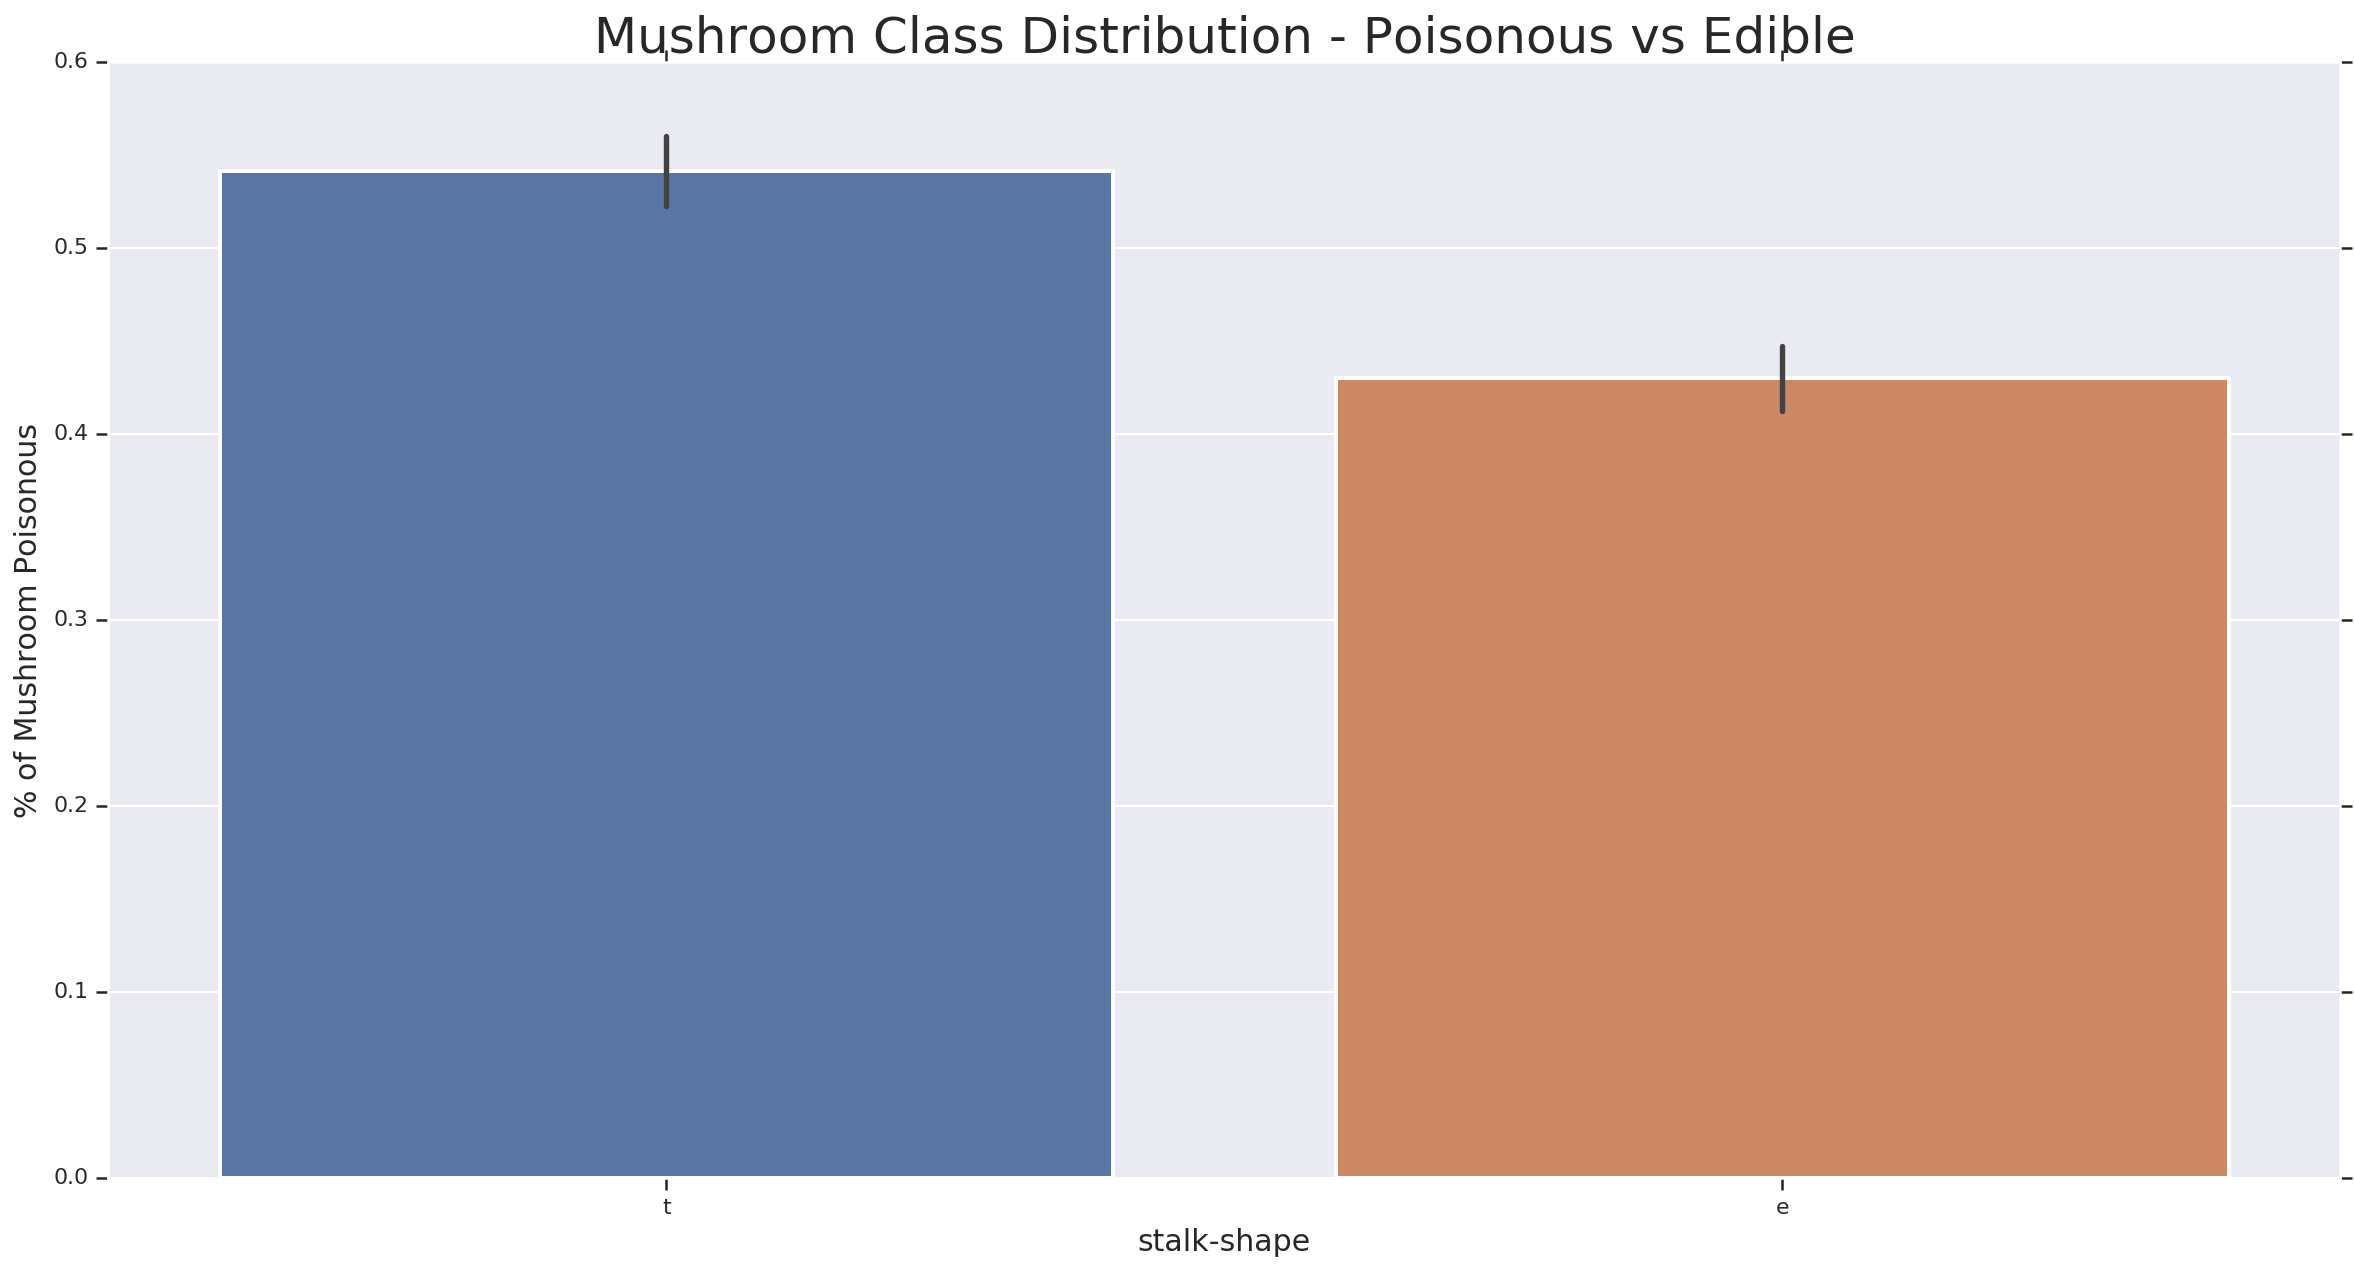

In [189]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "stalk-shape", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("stalk-shape", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['t','e']
val = [0, 1]
plt.xticks(val, labels);

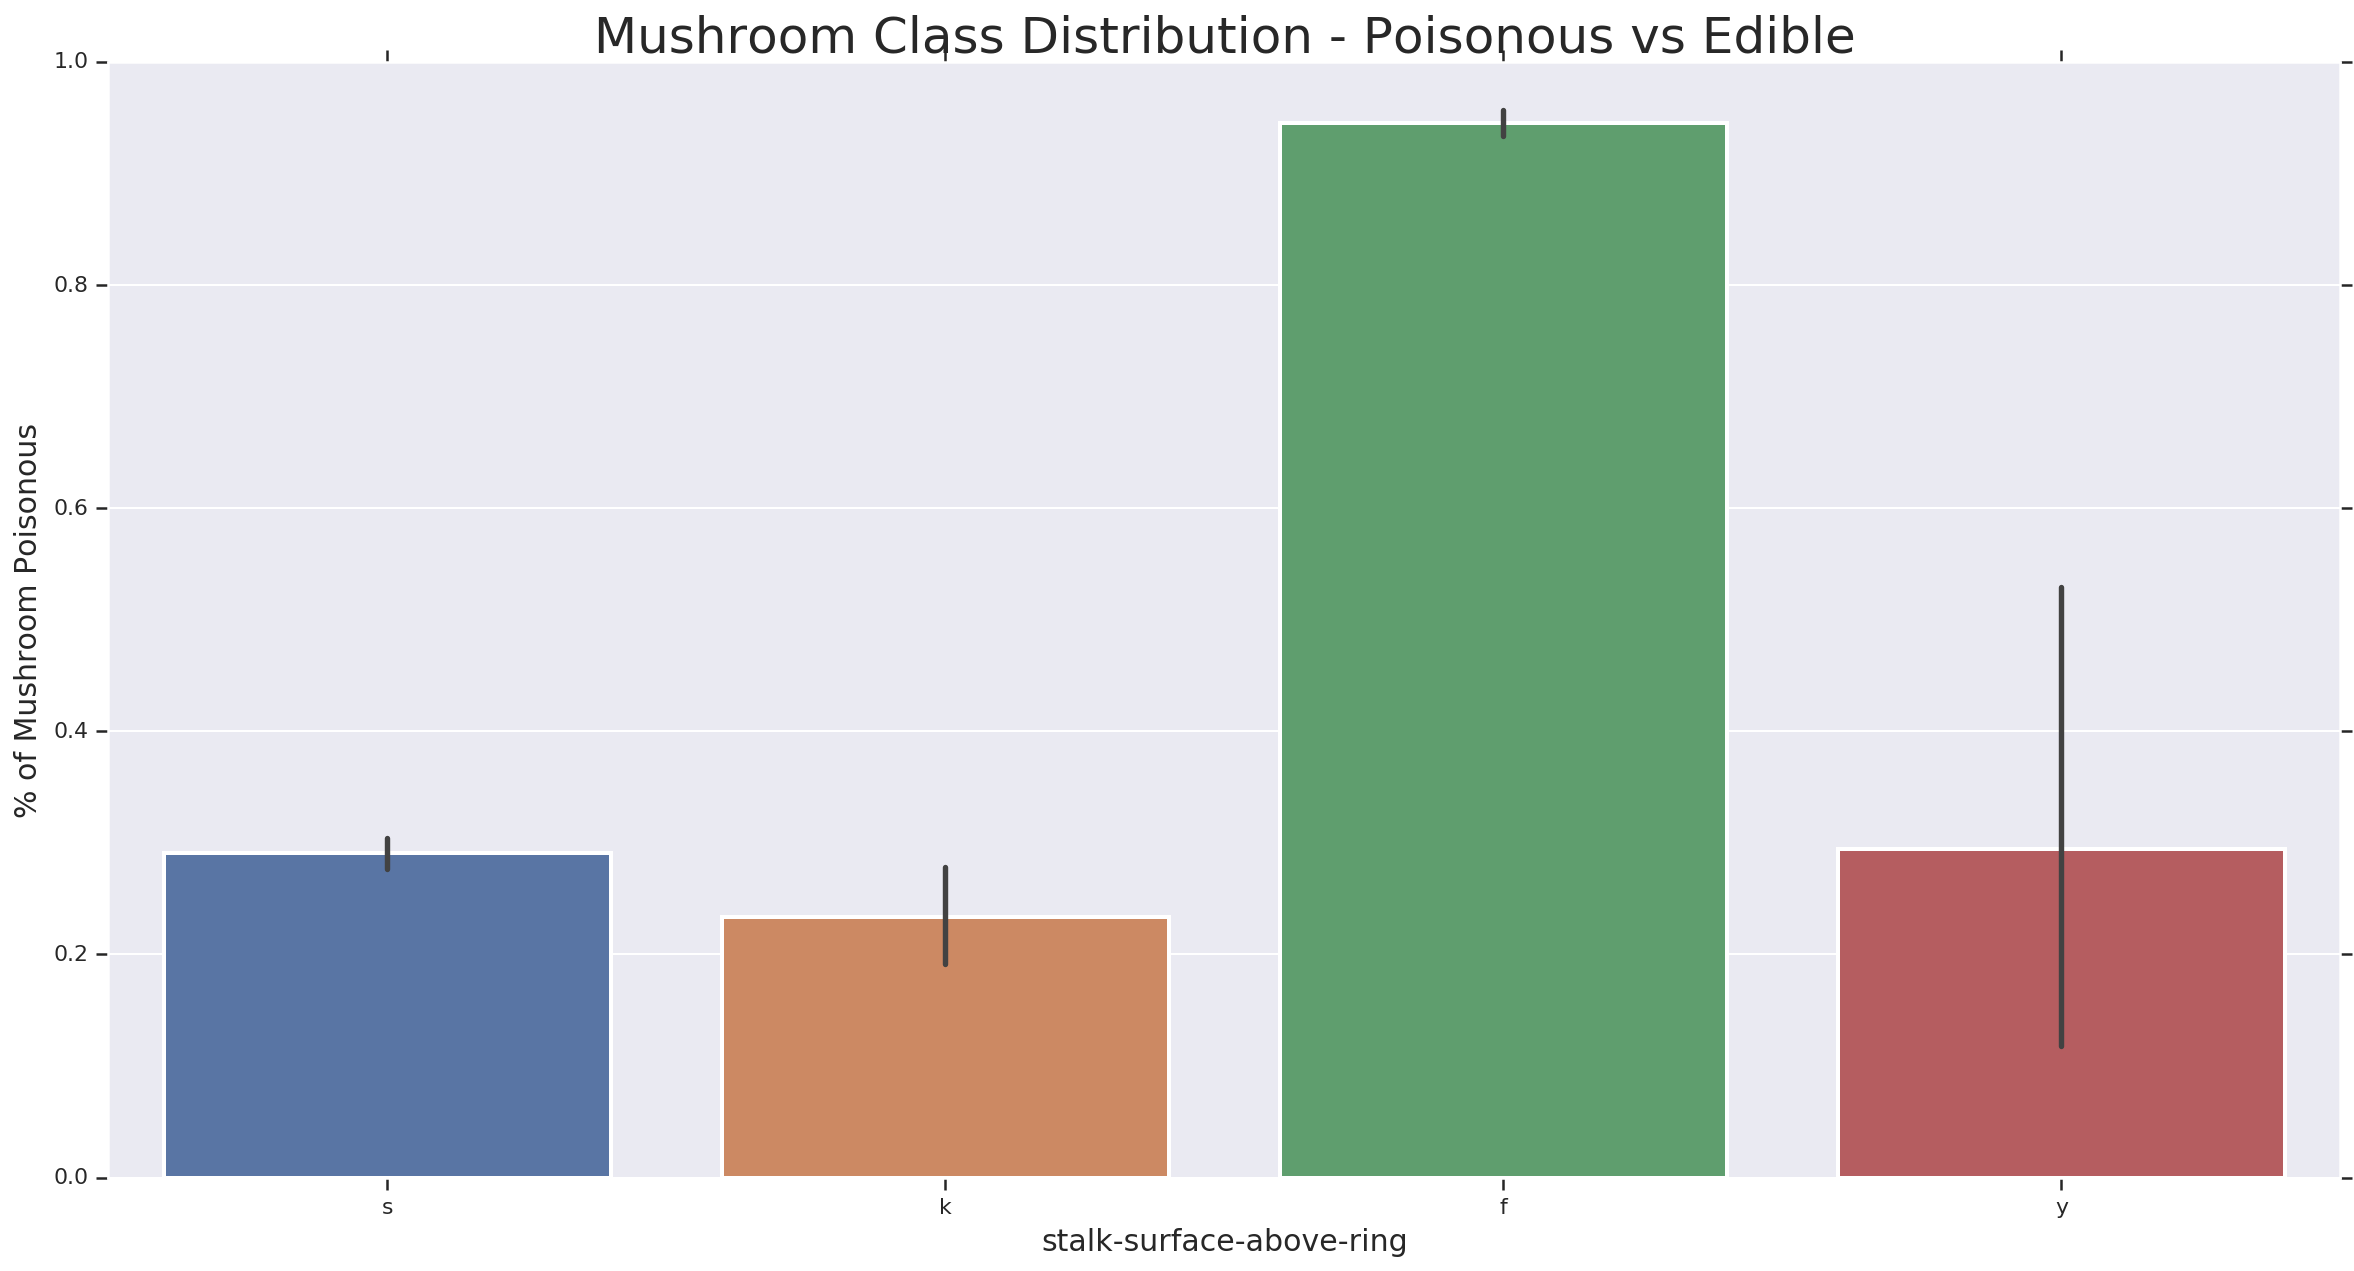

In [190]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "stalk-surface-above-ring", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("stalk-surface-above-ring", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['s','k','f','y']
val = [0, 1,2,3]
plt.xticks(val, labels);

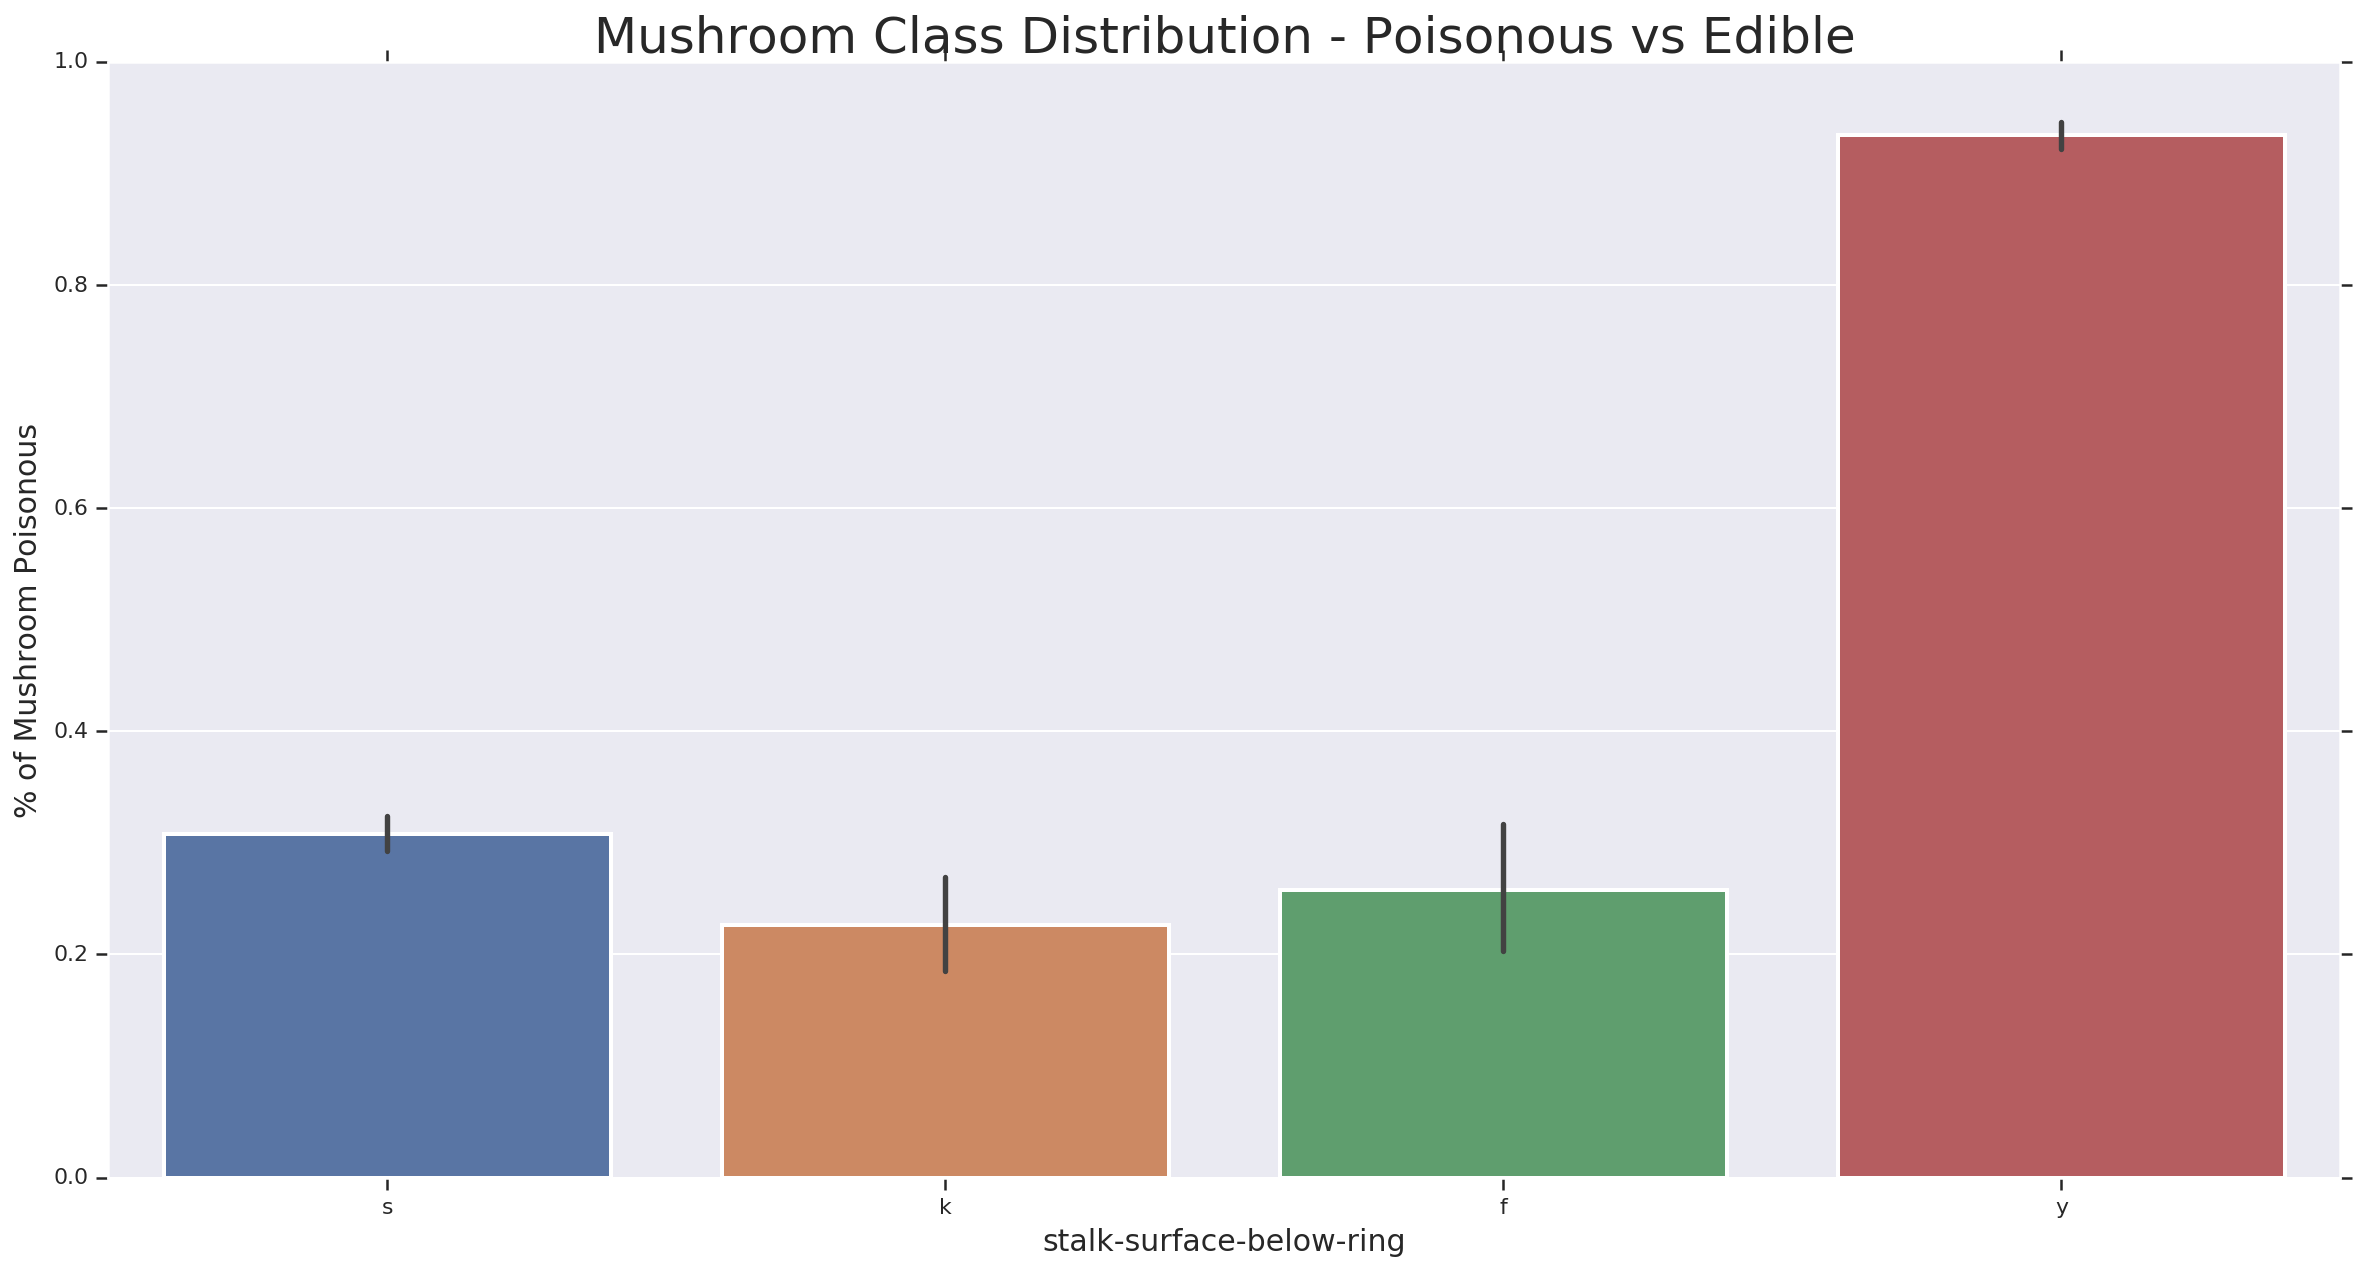

In [191]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "stalk-surface-below-ring", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("stalk-surface-below-ring", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['s','k','f','y']
val = [0, 1,2,3]
plt.xticks(val, labels);

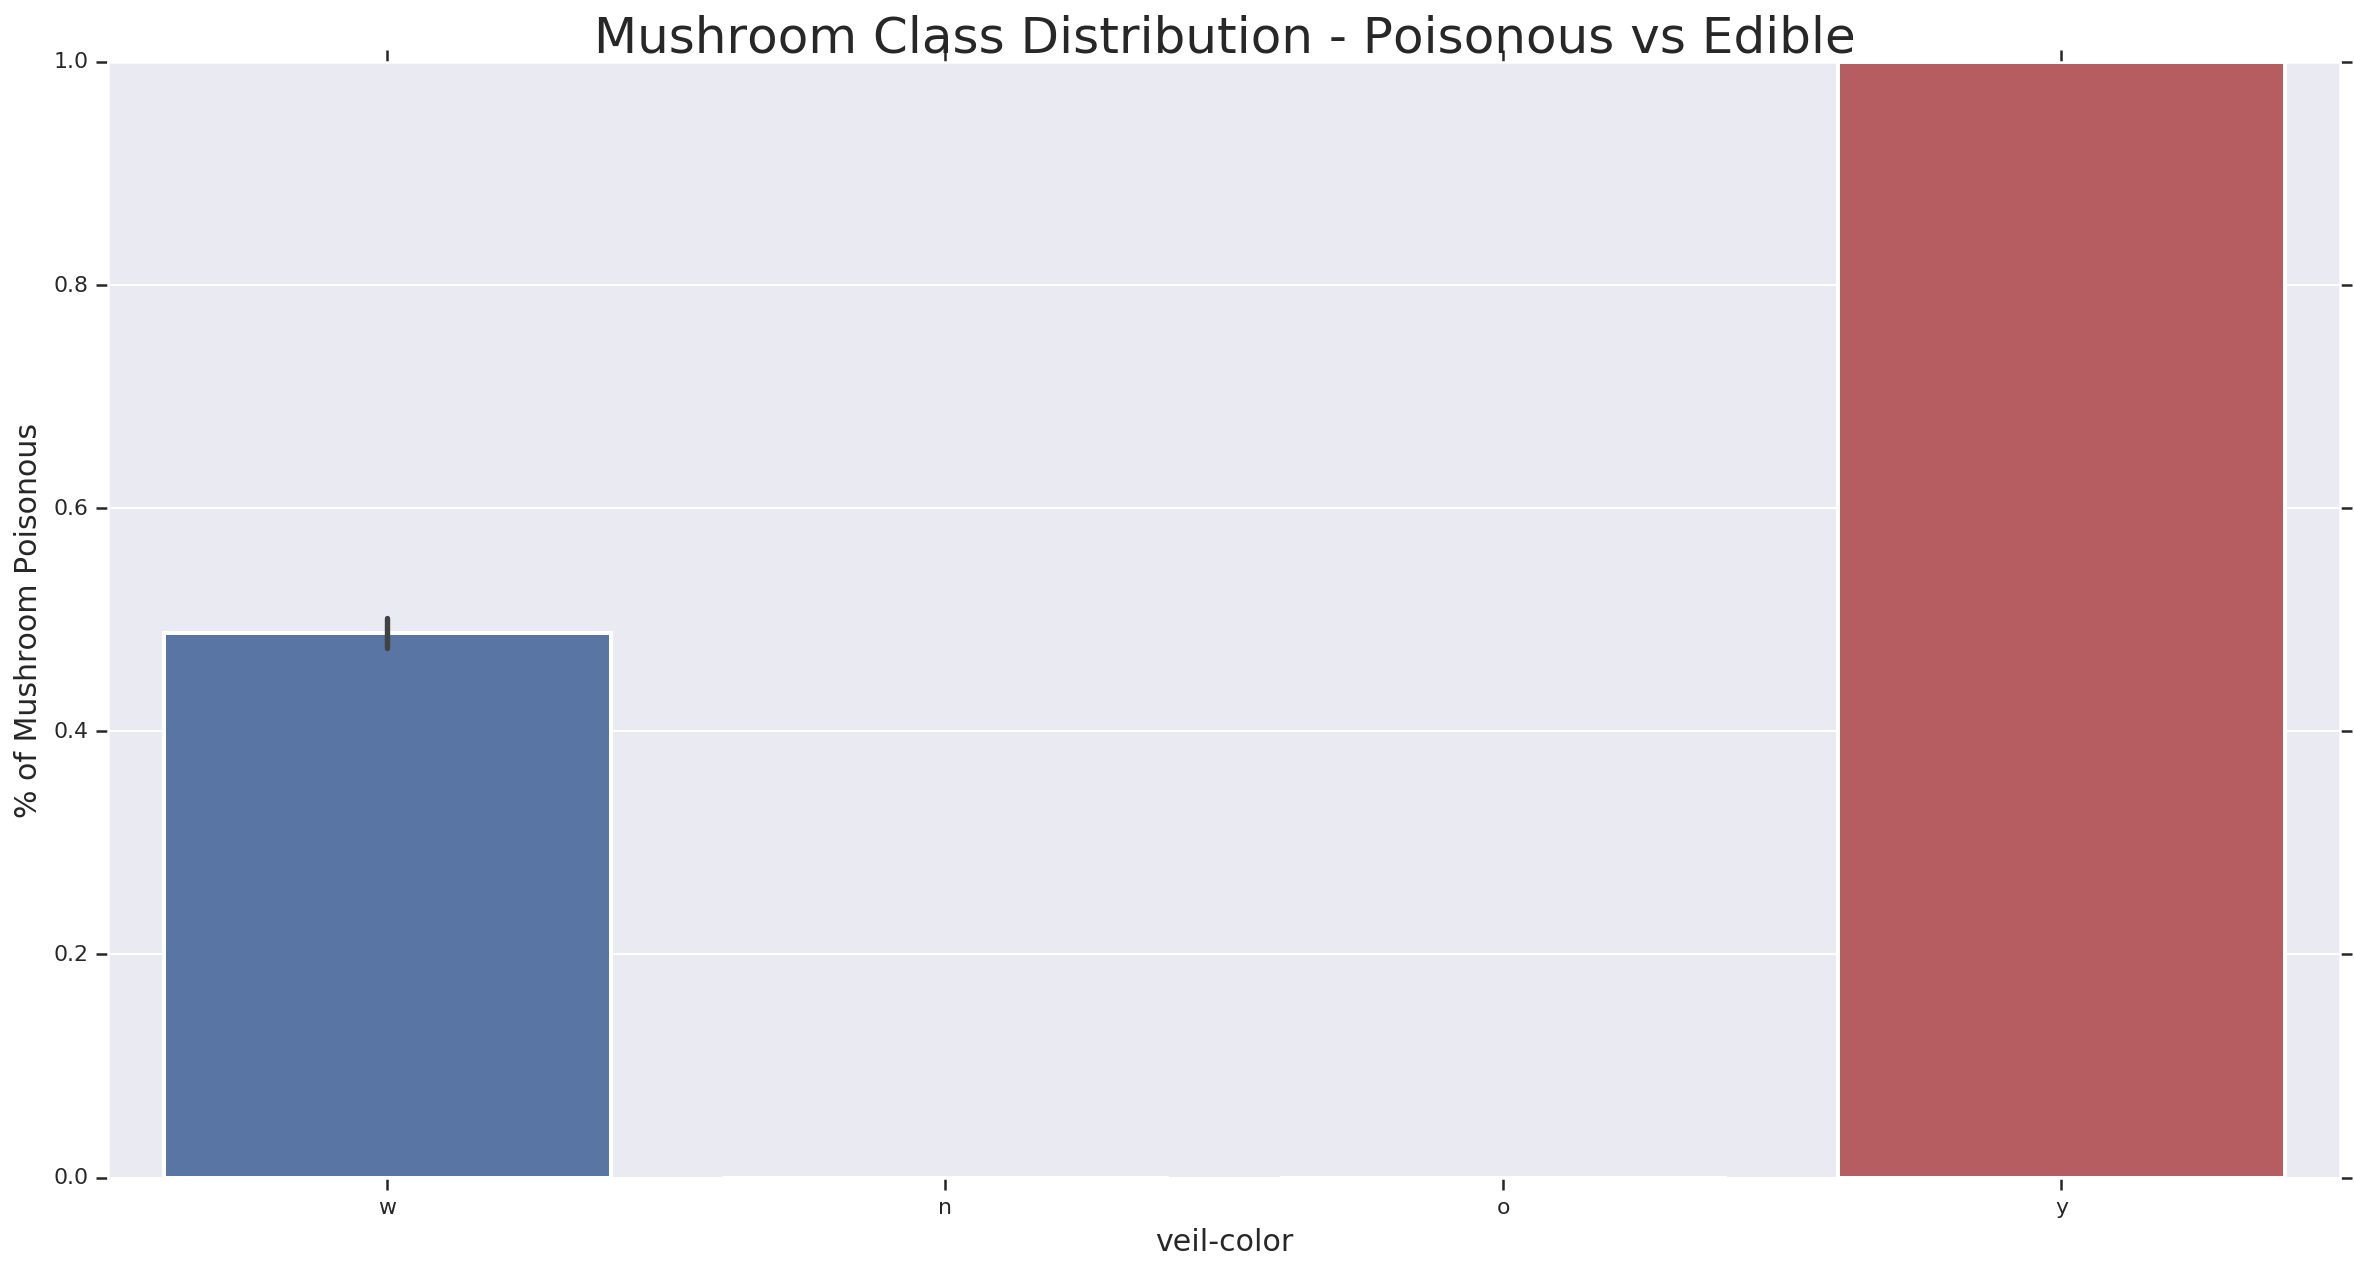

In [192]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "veil-color", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("veil-color", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['w','n','o', 'y']
val = [0, 1,2, 3]
plt.xticks(val, labels);

#### The percentage of w occupied the largest, however the other categories of the feature skewed seriously, we discard this feature.

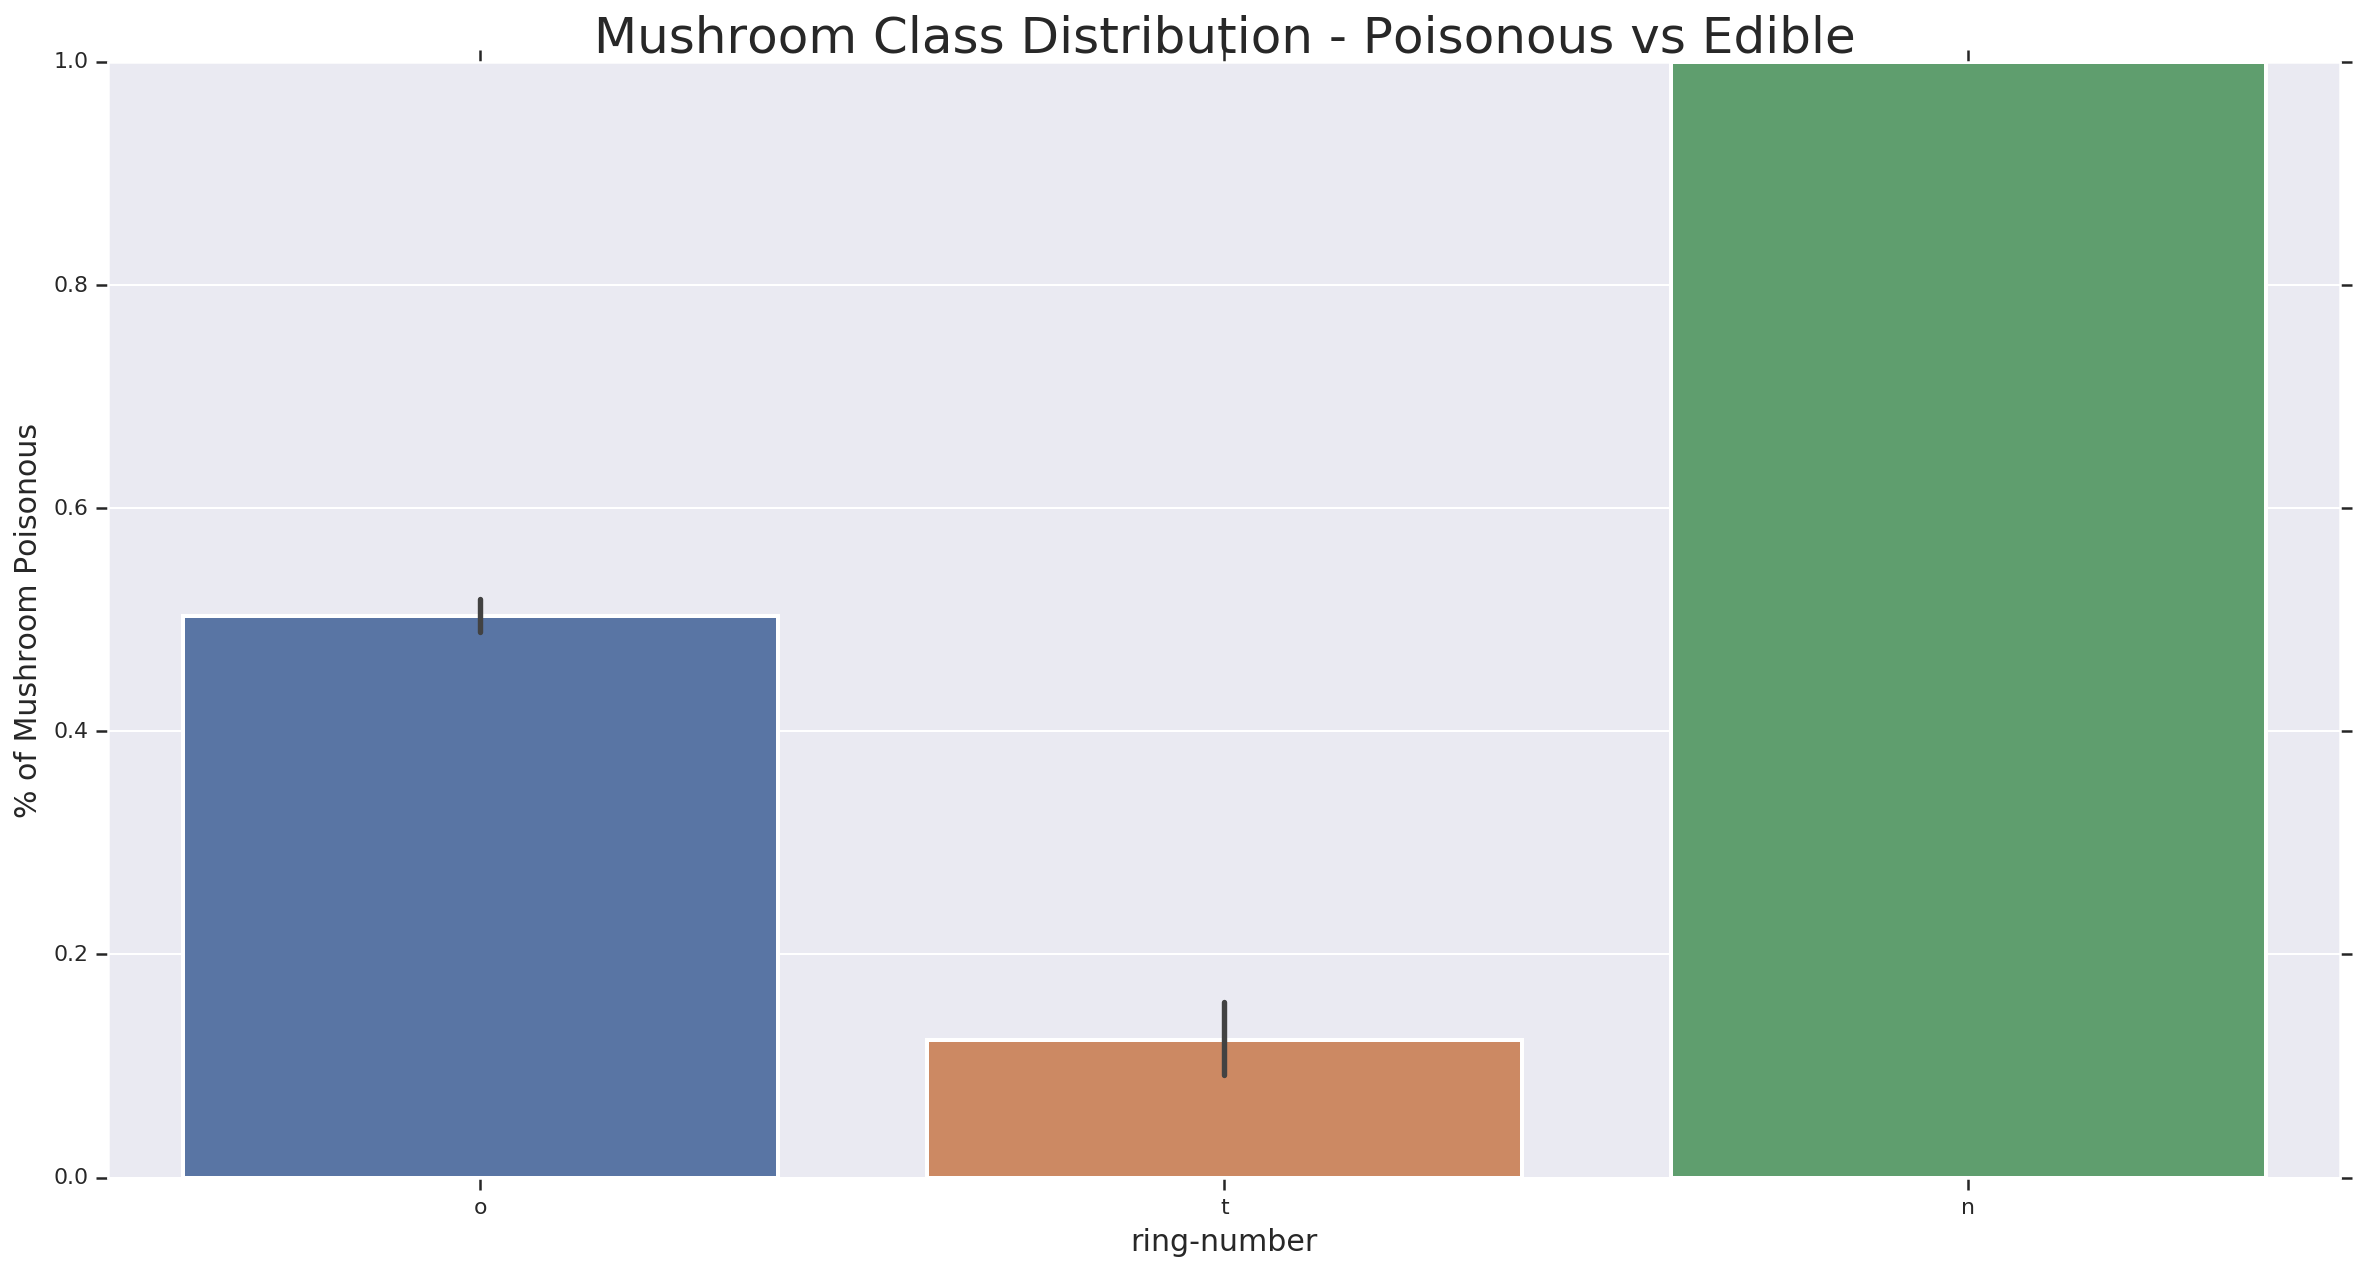

In [193]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "ring-number", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("ring-number", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['o','t','n']
val = [0, 1,2]
plt.xticks(val, labels);

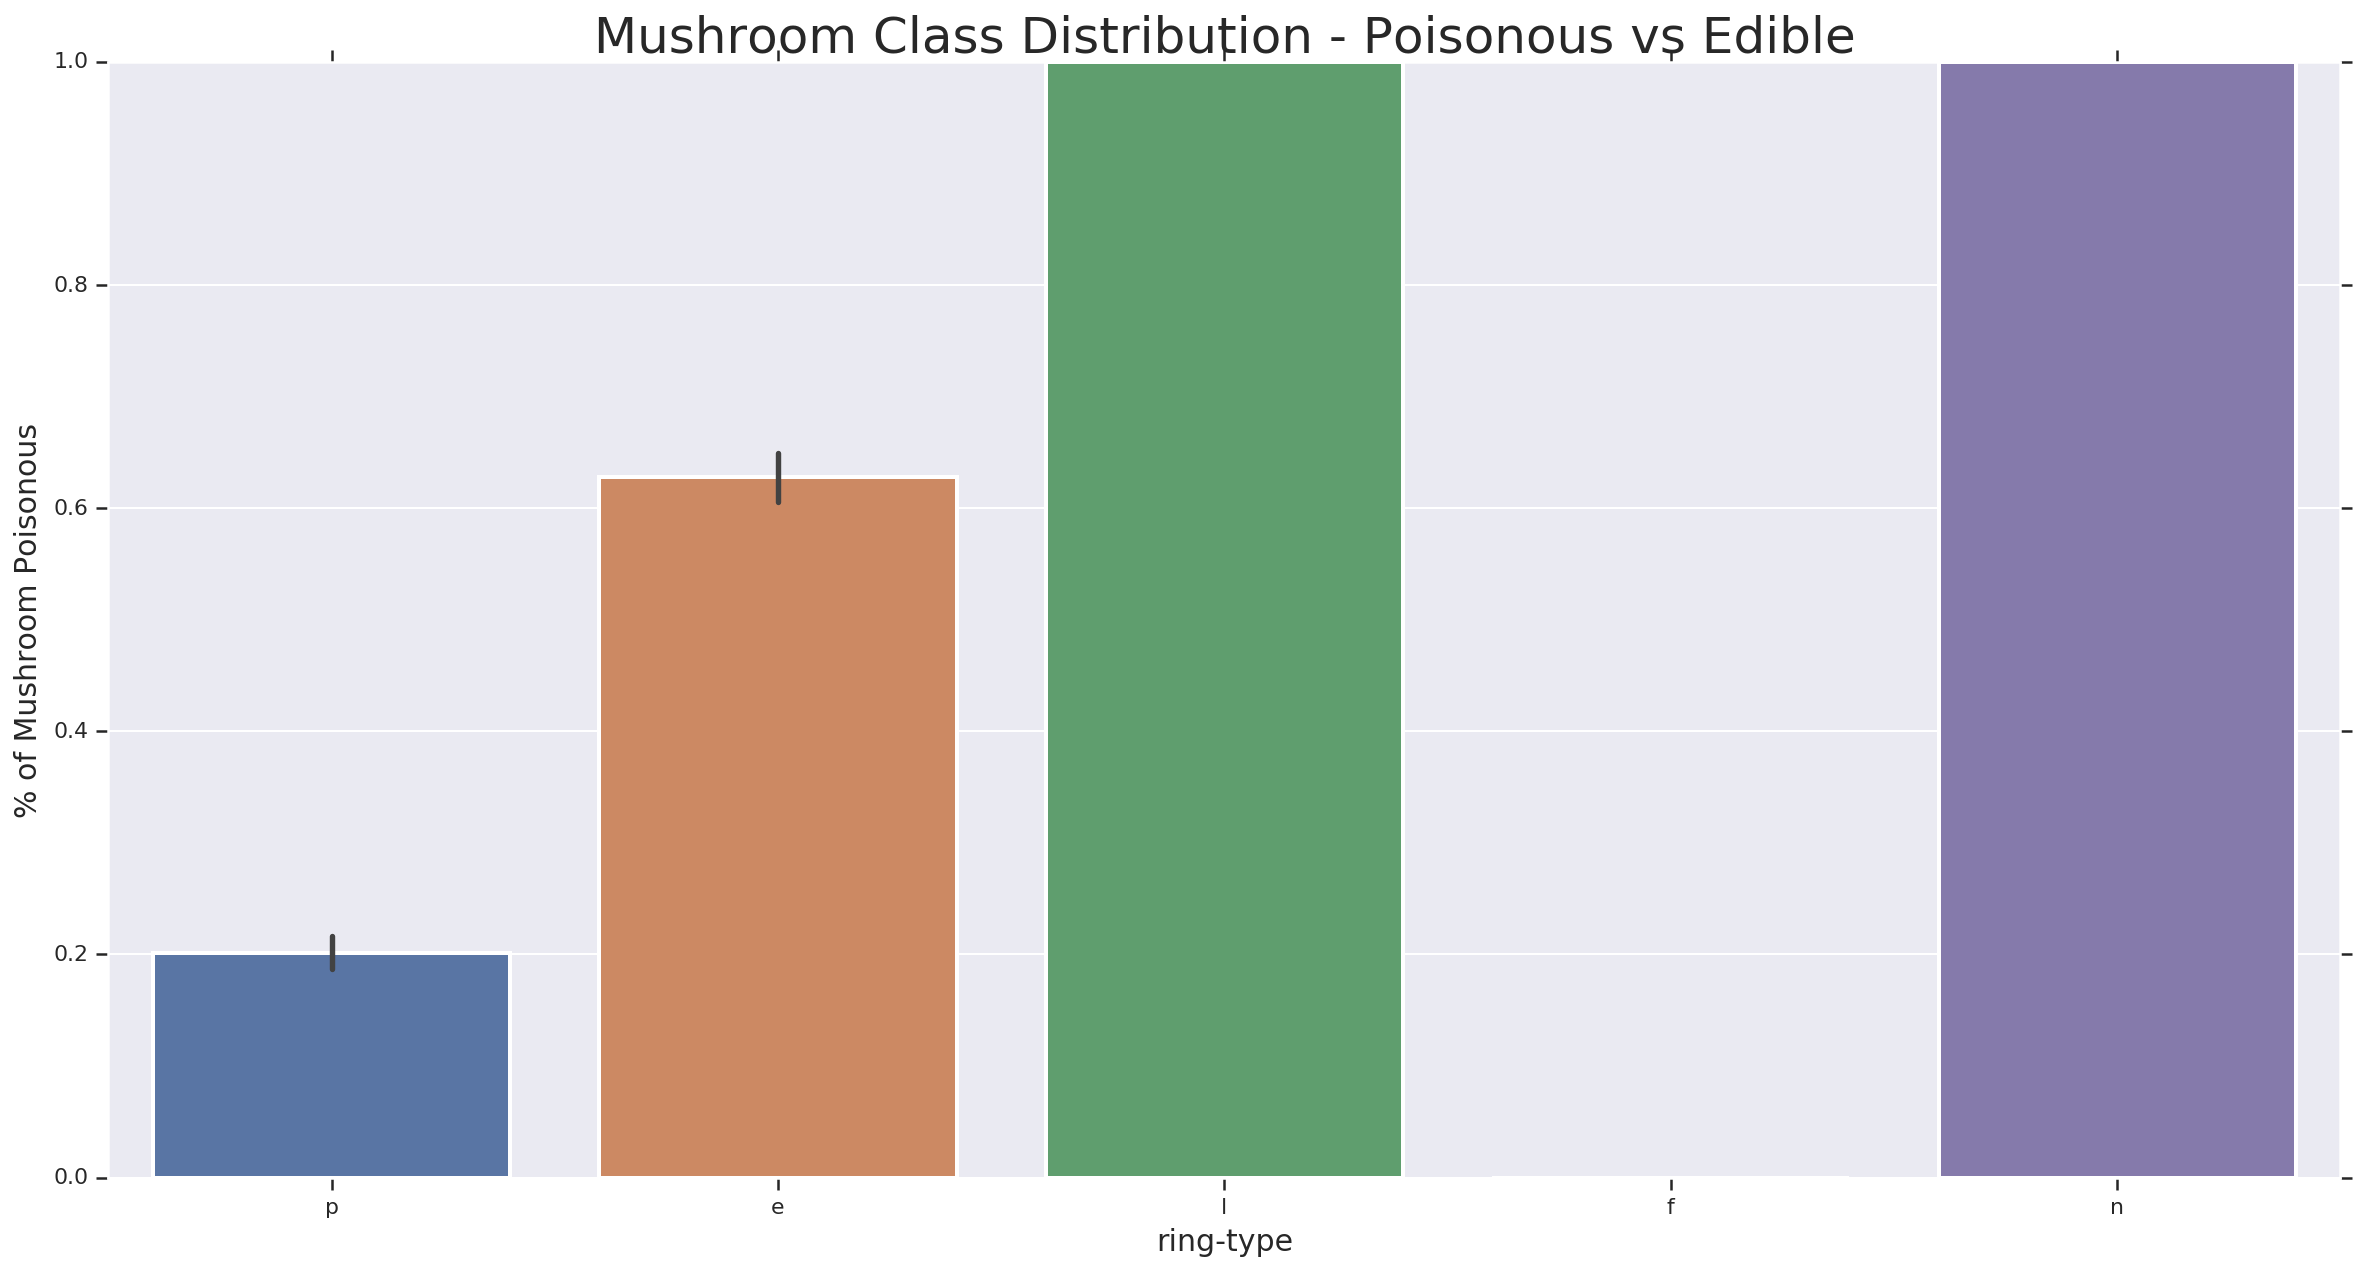

In [194]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "ring-type", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("ring-type", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['p','e','l','f','n']
val = [0, 1,2,3,4]
plt.xticks(val, labels);

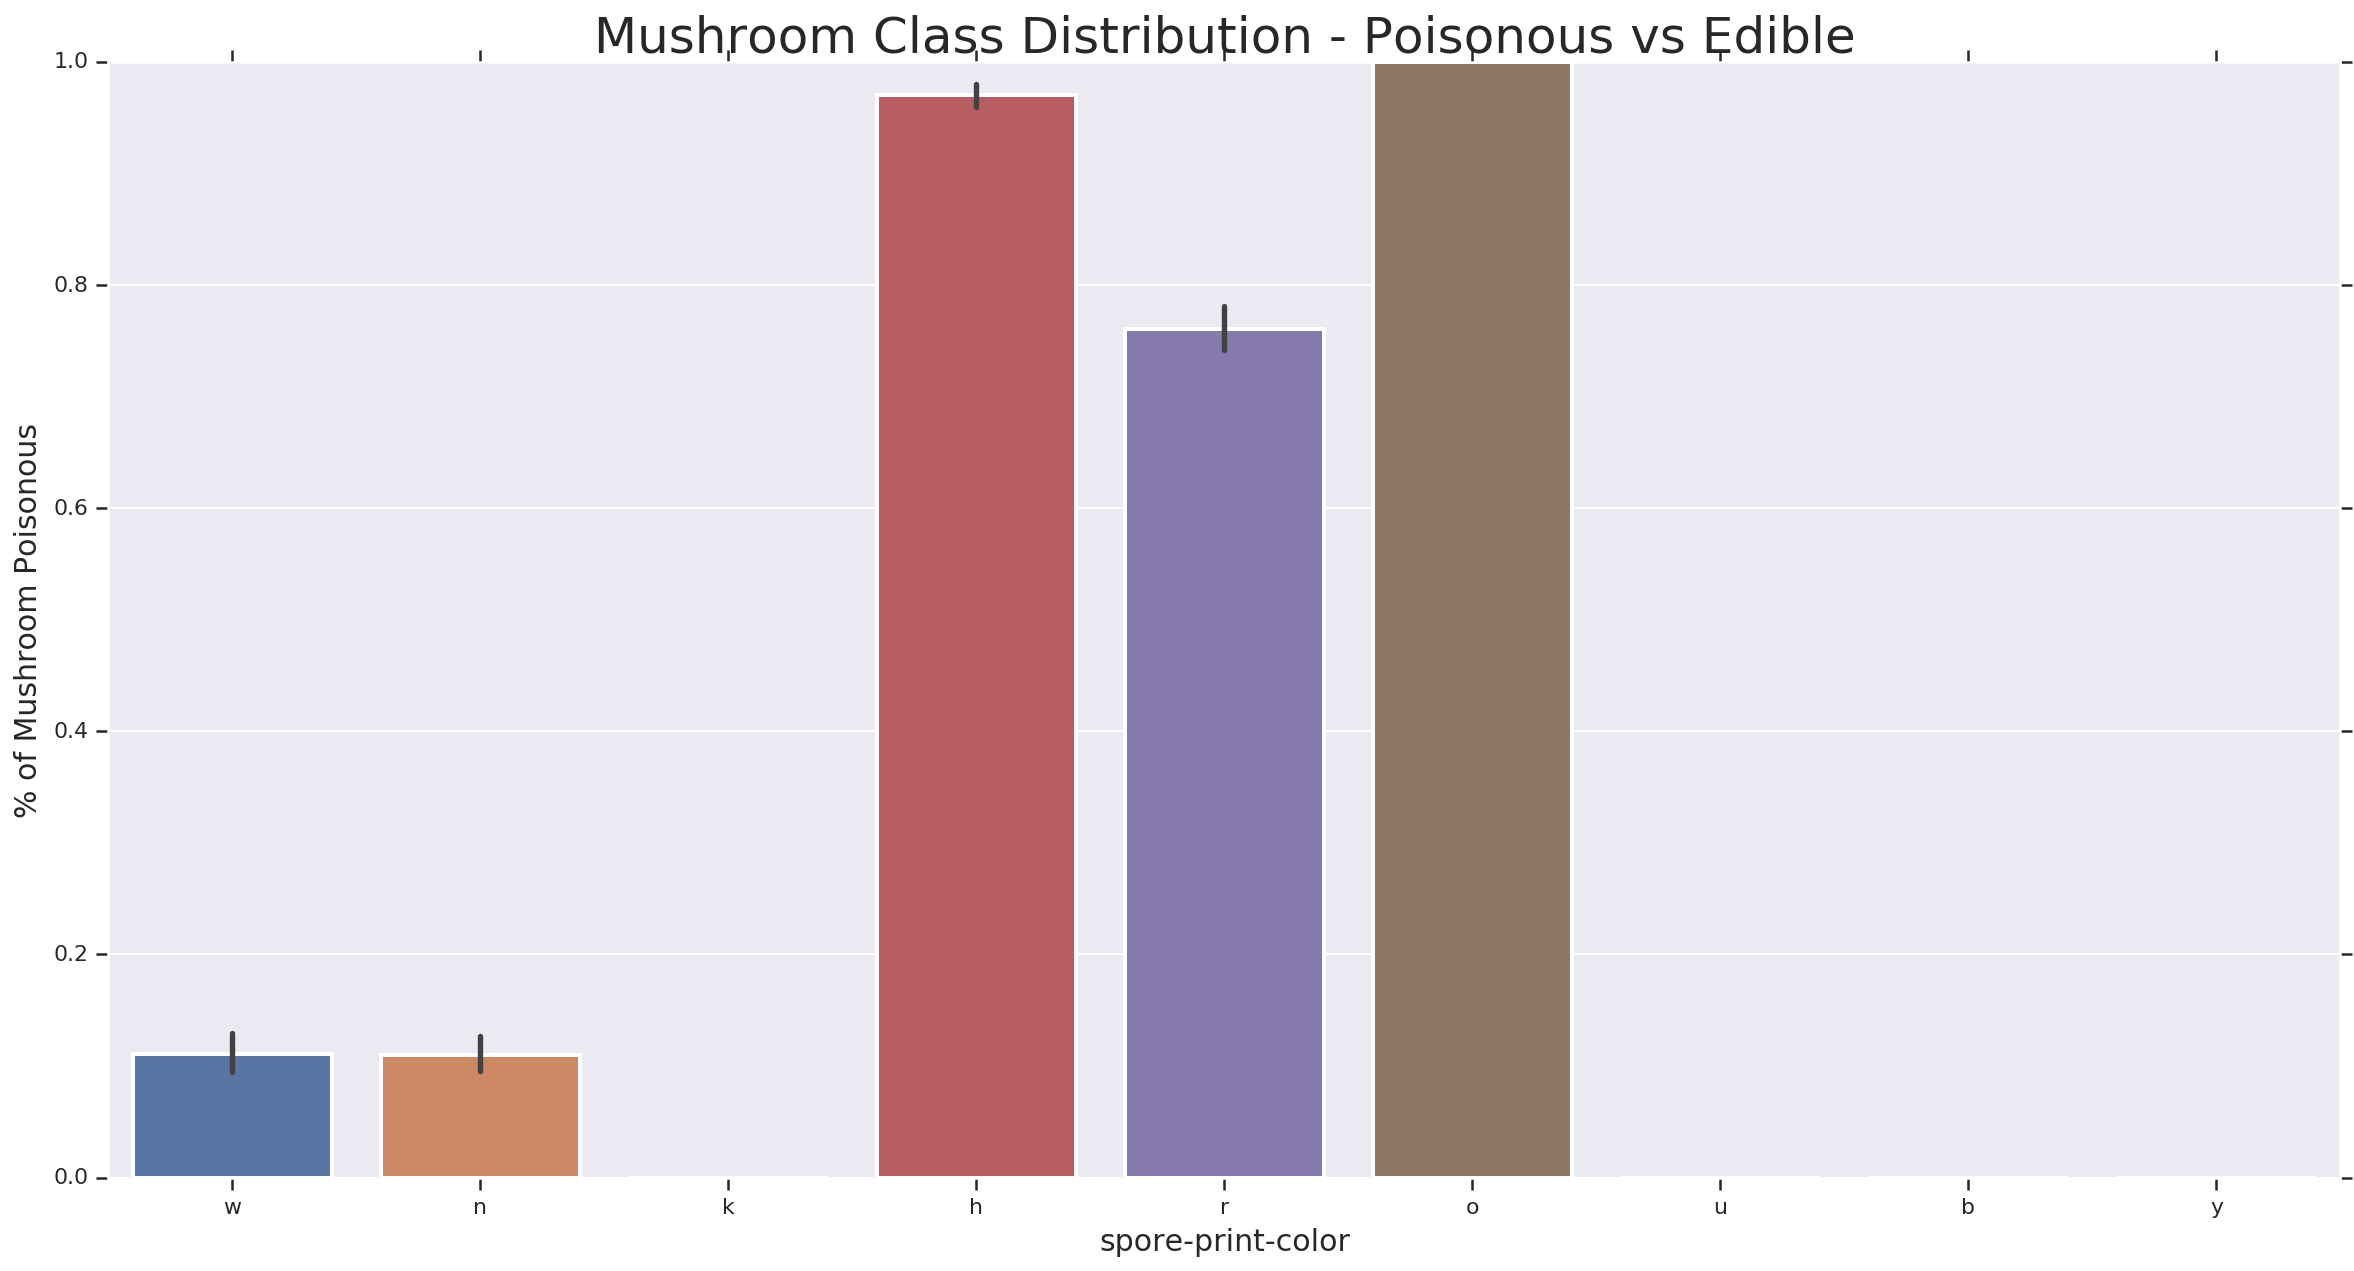

In [195]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "spore-print-color", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("spore-print-color", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['w','n','k','h','r','o','u','b','y']
val = [0, 1,2,3,4,5,6,7,8]
plt.xticks(val, labels);

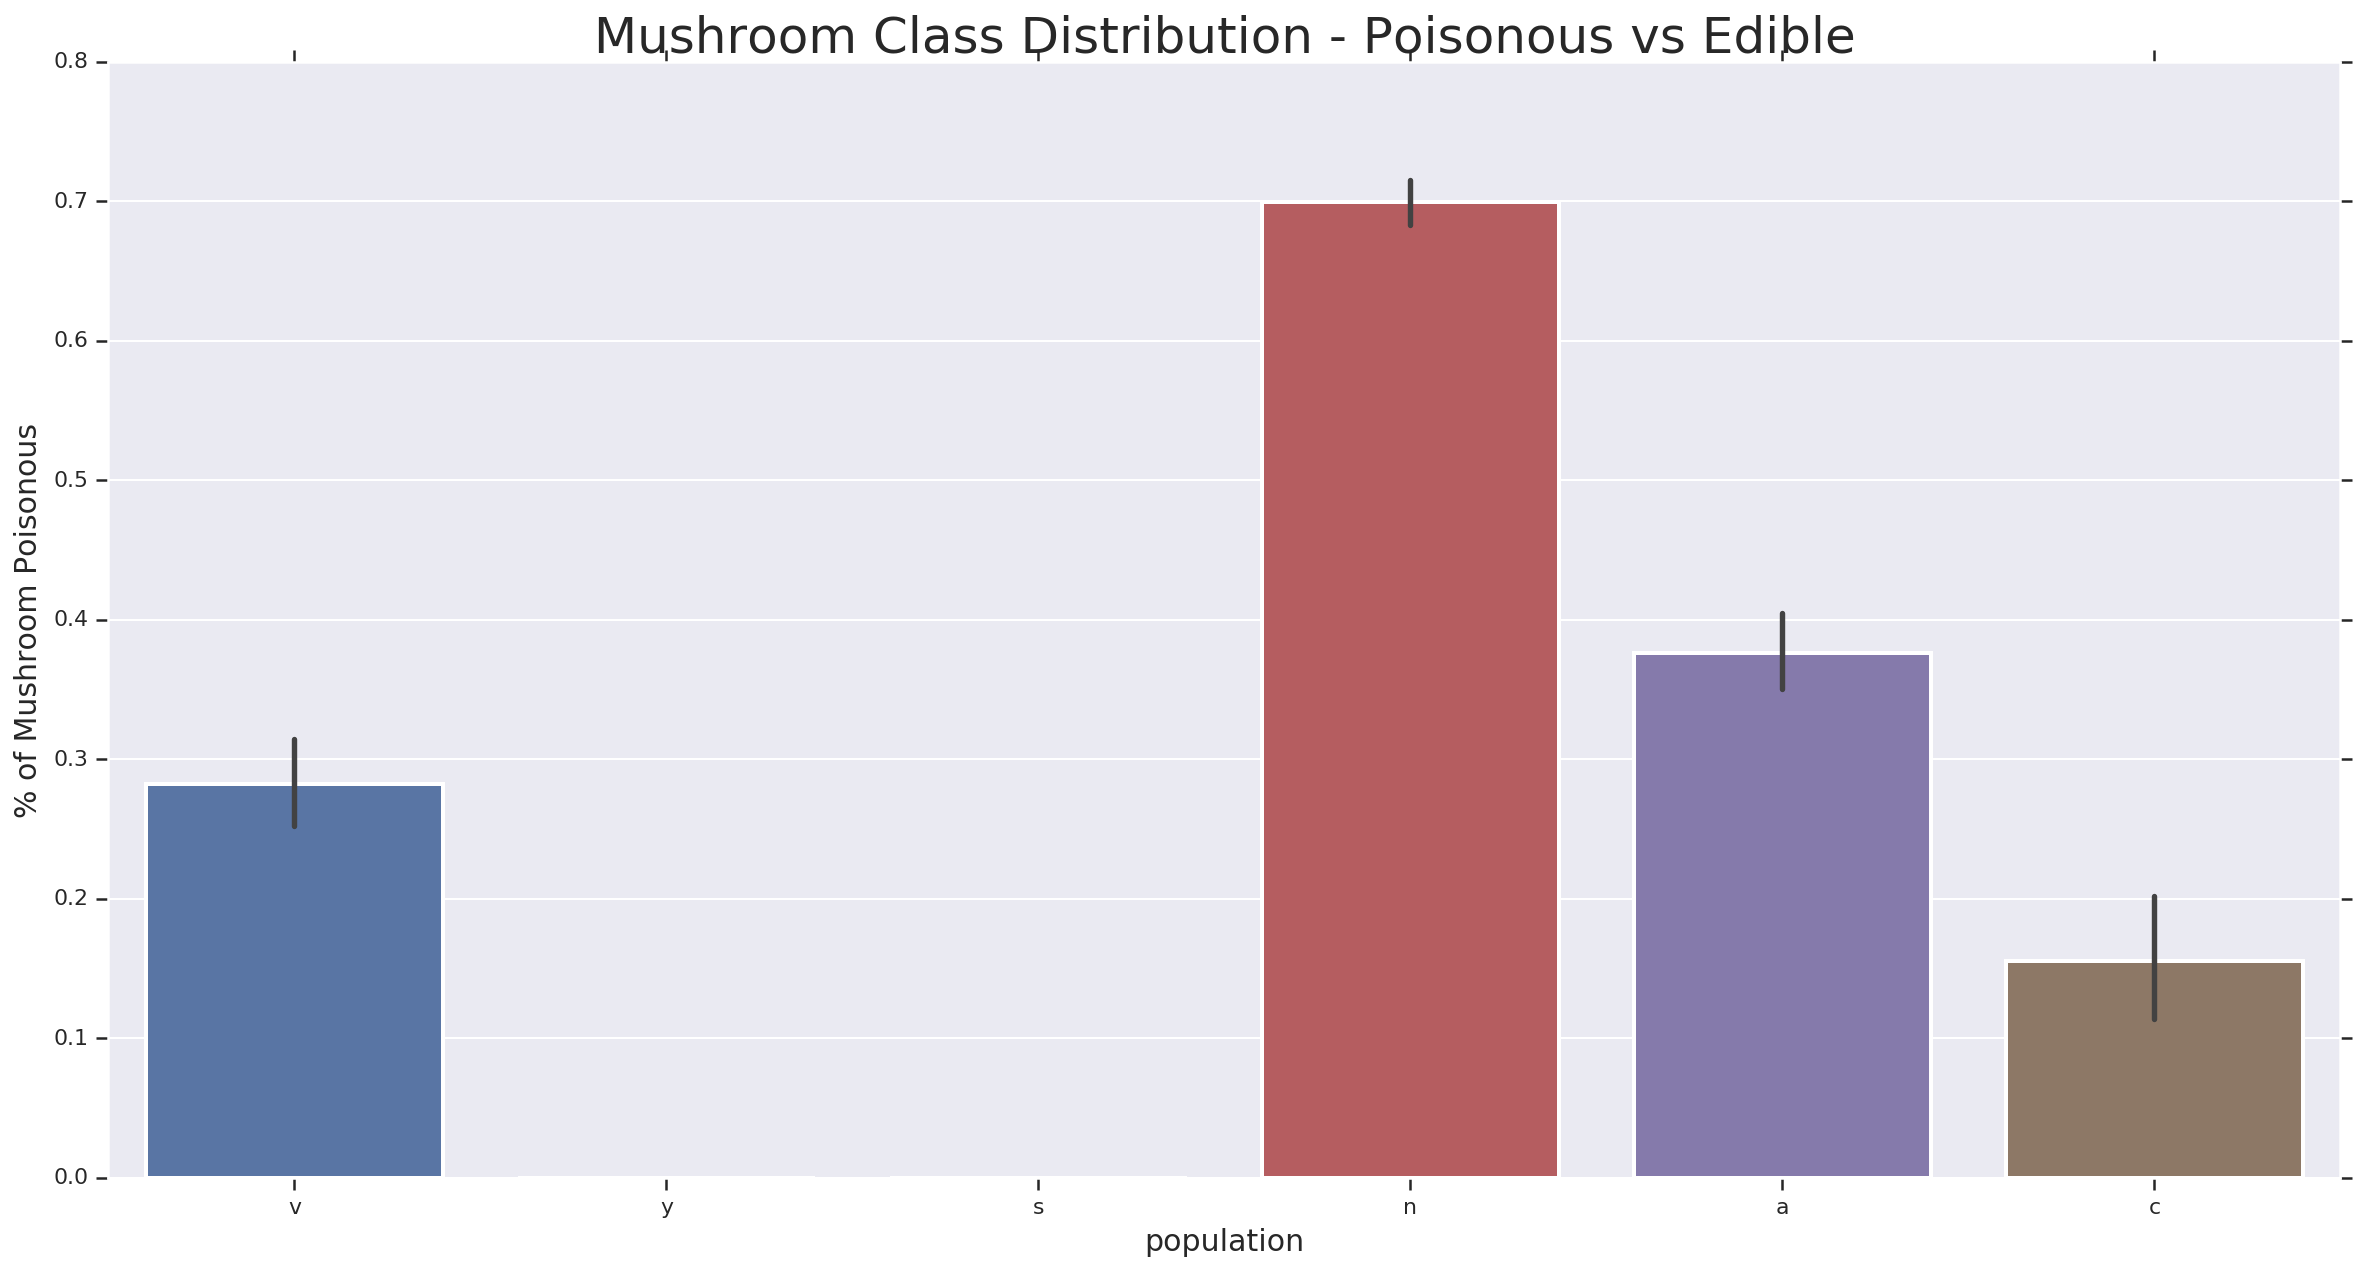

In [196]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "population", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("population", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['v','y','s','n','a','c']
val = [0, 1,2,3,4,5]
plt.xticks(val, labels);

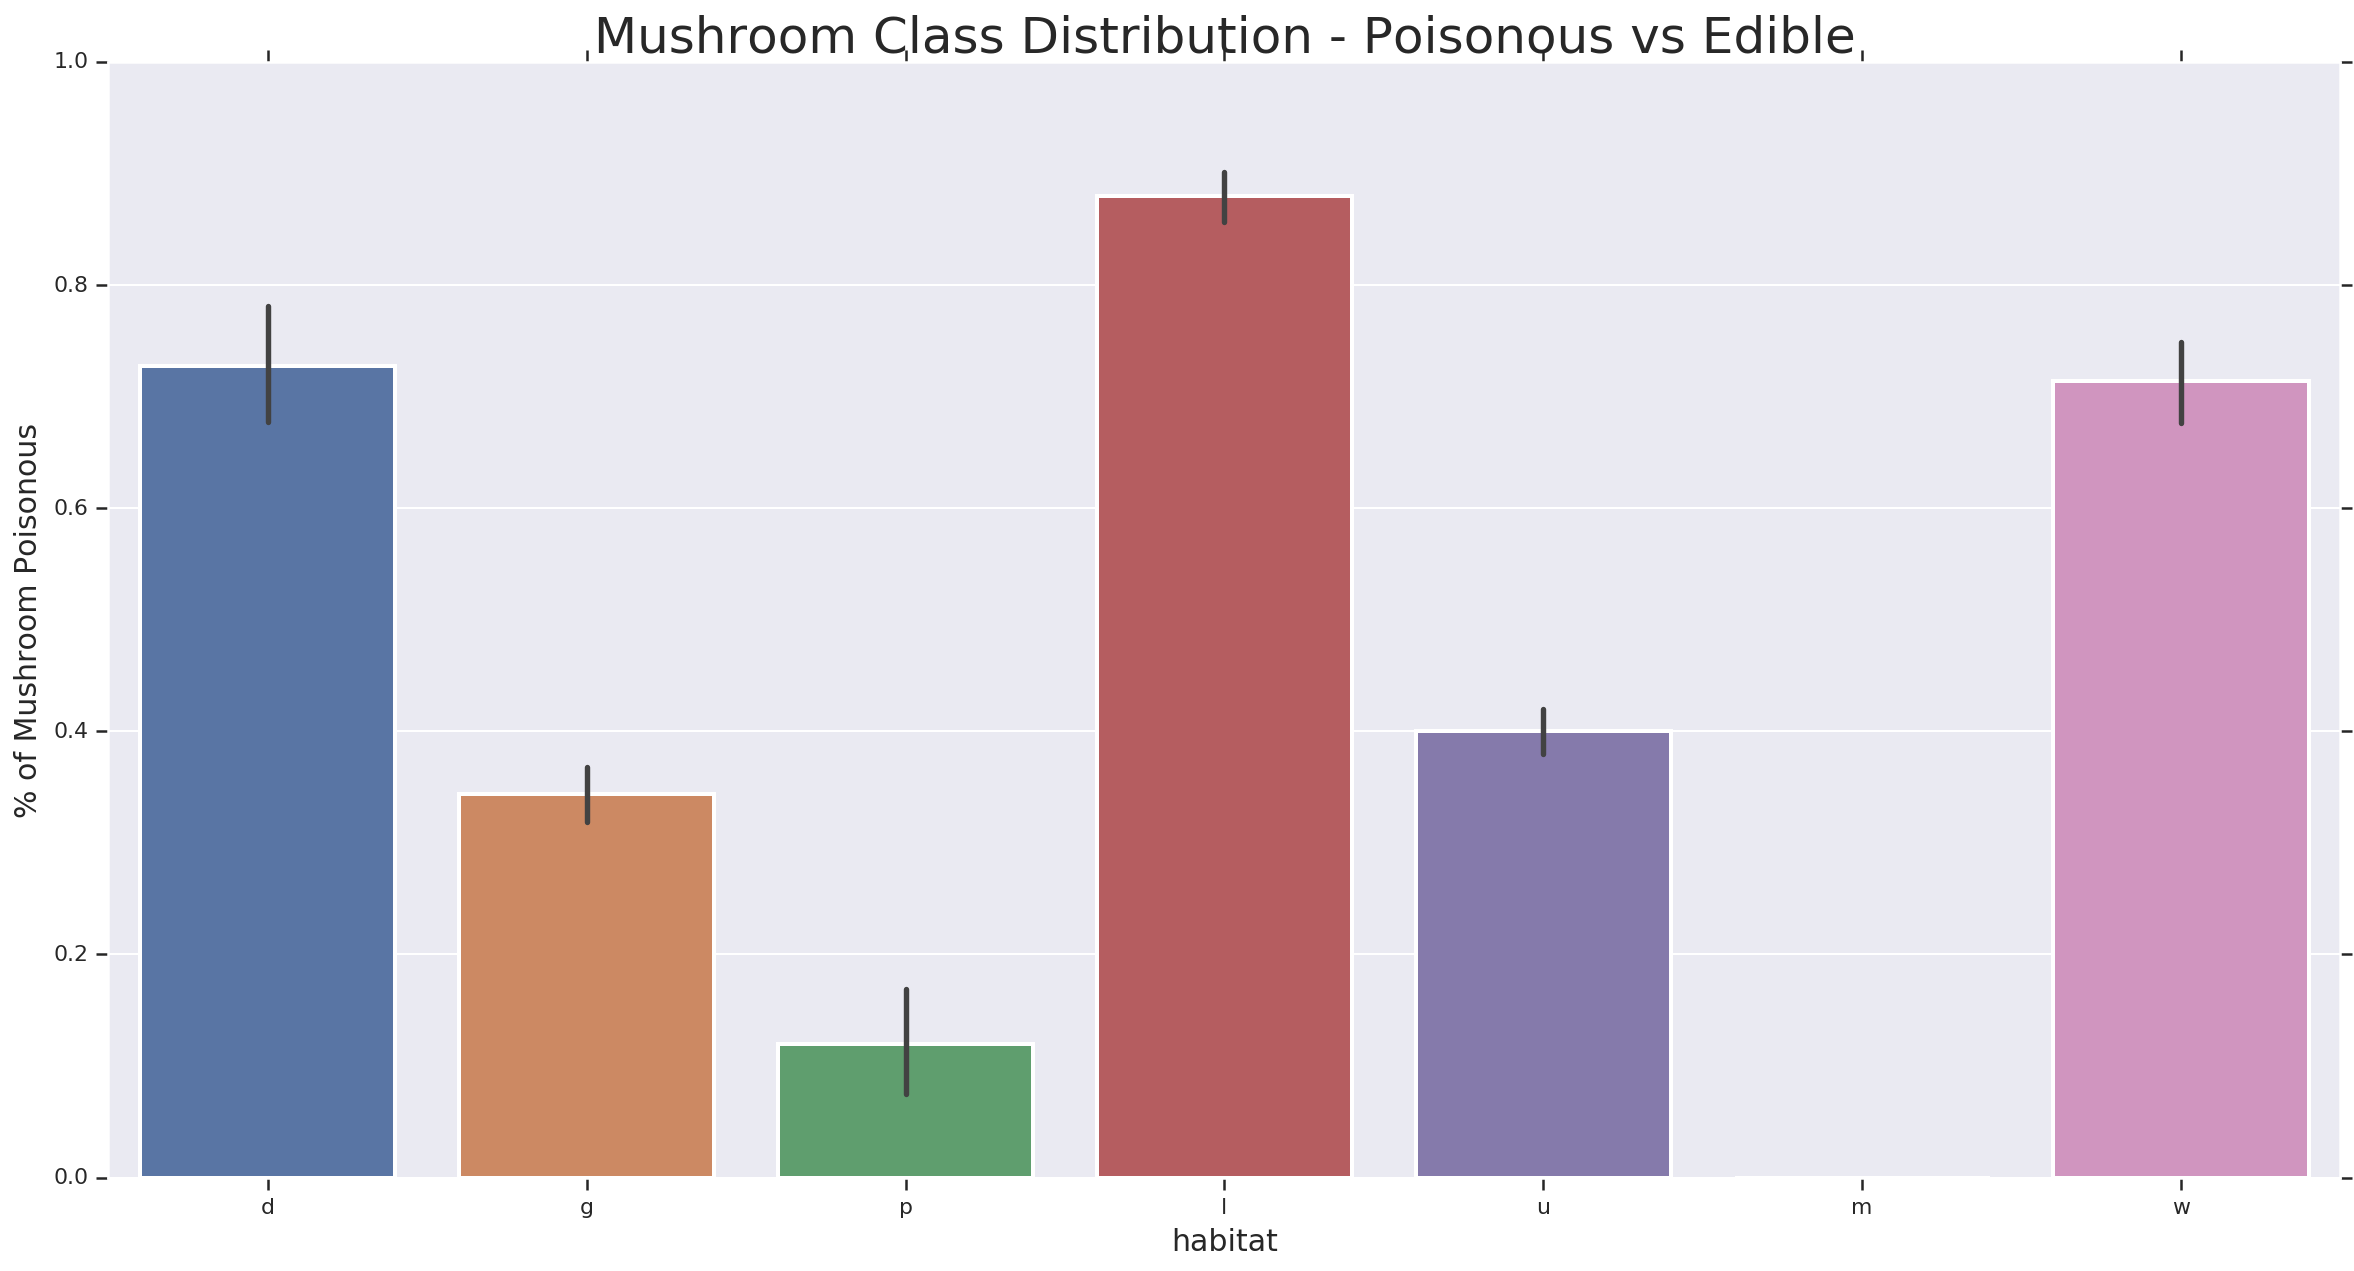

In [197]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "habitat", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("habitat", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['d','g','p','l','u','m','w']
val = [0, 1,2,3,4,5,6]
plt.xticks(val, labels);

### Based on the data visualization of the features, the features "odor", "veil-type" and "veil-color" should be discarded.

# Part 4: Statistical Overview

### Train Info

In [198]:
train_copy.describe()

,Id
count,5657.000000
mean,4028.688351
std,2334.652887
min,0.000000
25%,2007.000000
50%,4012.000000
75%,6042.000000
max,8123.000000


In [199]:
# Convert class category as float datatype
train_copy['class'] = train_copy['class'].astype(float)

In [200]:
# Overview Poisonous vs edible
train_copy[['cap-shape', 'class']].groupby('cap-shape').mean().reset_index()

,cap-shape,class
0,b,0.103679
1,c,1.000000
2,f,0.487528
3,k,0.714286
4,s,0.000000
5,x,0.465243


In [201]:
# Overview (poisonous vs edible)
poisonous_summary = train_copy.groupby("class")
poisonous_summary.mean().reset_index()

,class,Id
0,0.0,2837.520636
1,1.0,5332.313588


Because all the features are categorical, there is no need to show combined features further!

### Based on the data visualization and analysis, we decide to discard the feature "odor", "veil-type" and "veil-color", and in order to make the experiements be simpler, we just simply encode the categorical features (Not with one hot encoding).

In [202]:
train_copy.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
0,1.0,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0
1,0.0,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,1


In [203]:
# Encode cap-shape
train_copy['cap-shape'] = train_copy['cap-shape'].apply(lambda x: 0 if x == 'x' else (1 if x == 'f' else (2 if x == 'k' else (3 if x == 'b' else (4 if x == 's' else 5)))))
test_copy['cap-shape'] = test_copy['cap-shape'].apply(lambda x: 0 if x == 'x' else (1 if x == 'f' else (2 if x == 'k' else (3 if x == 'b' else (4 if x == 's' else 5)))))

In [204]:
# Encode cap-surface
train_copy['cap-surface'] = train_copy['cap-surface'].apply(lambda x: 0 if x == 'y' else (1 if x == 's' else (2 if x == 'f' else 3)))
test_copy['cap-surface'] = test_copy['cap-surface'].apply(lambda x: 0 if x == 'y' else (1 if x == 's' else (2 if x == 'f' else 3)))

In [205]:
# Encode cap-color
train_copy['cap-color'] = train_copy['cap-color'].apply(lambda x: 0 if x == 'n' else (1 if x == 'g' else (2 if x == 'e' else (3 if x == 'y' else (4 if x == 'w' else (5 if x == 'b' else ( 6 if x == 'p' else (7 if x == 'c' else (8 if x == 'r' else 9)))))))))
test_copy['cap-color'] = test_copy['cap-color'].apply(lambda x: 0 if x == 'n' else (1 if x == 'g' else (2 if x == 'e' else (3 if x == 'y' else (4 if x == 'w' else (5 if x == 'b' else ( 6 if x == 'p' else (7 if x == 'c' else (8 if x == 'r' else 9)))))))))

In [206]:
# Encode bruises
train_copy['bruises'] = train_copy['bruises'].apply(lambda x: 0 if x == 'f' else 1)
test_copy['bruises'] = test_copy['bruises'].apply(lambda x: 0 if x == 'f' else 1)

In [207]:
# Encode gill-attachment
train_copy['gill-attachment'] = train_copy['gill-attachment'].apply(lambda x: 0 if x == 'f' else 1)
test_copy['gill-attachment'] = test_copy['gill-attachment'].apply(lambda x: 0 if x == 'f' else 1)

In [208]:
# Encode gill-attachment
train_copy['gill-spacing'] = train_copy['gill-spacing'].apply(lambda x: 0 if x == 'c' else 1)
test_copy['gill-spacing'] = test_copy['gill-spacing'].apply(lambda x: 0 if x == 'c' else 1)

In [209]:
# Encode gill-size
train_copy['gill-size'] = train_copy['gill-size'].apply(lambda x: 0 if x == 'b' else 1)
test_copy['gill-size'] = test_copy['gill-size'].apply(lambda x: 0 if x == 'b' else 1)

In [210]:
# Encode gill-color
train_copy['gill-color'] = train_copy['gill-color'].apply(lambda x: 0 if x == 'b' else (1 if x == 'p' else (2 if x == 'w' else (3 if x == 'n' else (4 if x == 'g' else (5 if x == 'h' else ( 6 if x == 'u' else (7 if x == 'k' else (8 if x == 'e' else (9 if x == 'y' else (10 if x == 'o' else 11)))))))))))
test_copy['gill-color'] = test_copy['gill-color'].apply(lambda x: 0 if x == 'b' else (1 if x == 'p' else (2 if x == 'w' else (3 if x == 'n' else (4 if x == 'g' else (5 if x == 'h' else ( 6 if x == 'u' else (7 if x == 'k' else (8 if x == 'e' else (9 if x == 'y' else (10 if x == 'o' else 11)))))))))))

In [211]:
# Encode stalk-shape
train_copy['stalk-shape'] = train_copy['stalk-shape'].apply(lambda x: 0 if x == 't' else 1)
test_copy['stalk-shape'] = test_copy['stalk-shape'].apply(lambda x: 0 if x == 't' else 1)

In [212]:
# Encode stalk-surface-above-ring
train_copy['stalk-surface-above-ring'] = train_copy['stalk-surface-above-ring'].apply(lambda x: 0 if x == 's' else (1 if x == 'k' else (2 if x == 'f' else 3)))
test_copy['stalk-surface-above-ring'] = test_copy['stalk-surface-above-ring'].apply(lambda x: 0 if x == 's' else (1 if x == 'k' else (2 if x == 'f' else 3)))

In [213]:
# Encode stalk-surface-above-ring
train_copy['stalk-surface-below-ring'] = train_copy['stalk-surface-below-ring'].apply(lambda x: 0 if x == 's' else (1 if x == 'k' else (2 if x == 'f' else 3)))
test_copy['stalk-surface-below-ring'] = test_copy['stalk-surface-below-ring'].apply(lambda x: 0 if x == 's' else (1 if x == 'k' else (2 if x == 'f' else 3)))

In [214]:
# Encode stalk-color-above-ring
train_copy['stalk-color-above-ring'] = train_copy['stalk-color-above-ring'].apply(lambda x: 0 if x == 'w' else (1 if x == 'p' else (2 if x == 'g' else (3 if x == 'n' else (4 if x == 'b' else (5 if x == 'o' else (6 if x == 'e' else (7 if x == 'c' else 8))))) )))
test_copy['stalk-color-above-ring'] = test_copy['stalk-color-above-ring'].apply(lambda x: 0 if x == 'w' else (1 if x == 'p' else (2 if x == 'g' else (3 if x == 'n' else (4 if x == 'b' else (5 if x == 'o' else (6 if x == 'e' else (7 if x == 'c' else 8))))) )))

In [215]:
# Encode stalk-color-below-ring
train_copy['stalk-color-below-ring'] = train_copy['stalk-color-below-ring'].apply(lambda x: 0 if x == 'w' else (1 if x == 'p' else (2 if x == 'g' else (3 if x == 'n' else (4 if x == 'b' else (5 if x == 'o' else (6 if x == 'e' else (7 if x == 'c' else 8))))) )))
test_copy['stalk-color-below-ring'] = test_copy['stalk-color-below-ring'].apply(lambda x: 0 if x == 'w' else (1 if x == 'p' else (2 if x == 'g' else (3 if x == 'n' else (4 if x == 'b' else (5 if x == 'o' else (6 if x == 'e' else (7 if x == 'c' else 8))))) )))

In [216]:
# Encode ring-number
train_copy['ring-number'] = train_copy['ring-number'].apply(lambda x: 0 if x == 'o' else (1 if x == 't' else 2))
test_copy['ring-number'] = test_copy['ring-number'].apply(lambda x: 0 if x == 'o' else (1 if x == 't' else 2))

In [217]:
# Encode ring-type
train_copy['ring-type'] = train_copy['ring-type'].apply(lambda x: 0 if x == 'p' else (1 if x == 'e' else (2 if x == 'l' else (3 if x == 'f' else 4))))
test_copy['ring-type'] = test_copy['ring-type'].apply(lambda x: 0 if x == 'p' else (1 if x == 'e' else (2 if x == 'l' else (3 if x == 'f' else 4))))

In [218]:
# Encode spore-print-color
train_copy['spore-print-color'] = train_copy['spore-print-color'].apply(lambda x: 0 if x == 'w' else (1 if x == 'n' else (2 if x == 'k' else (3 if x == 'h' else (4 if x == 'r' else (5 if x == 'o' else ( 6 if x == 'u' else (7 if x == 'b' else 8))))))))
test_copy['spore-print-color'] = test_copy['spore-print-color'].apply(lambda x: 0 if x == 'w' else (1 if x == 'n' else (2 if x == 'k' else (3 if x == 'h' else (4 if x == 'r' else (5 if x == 'o' else ( 6 if x == 'u' else (7 if x == 'b' else 8))))))))

In [219]:
# Encode population
train_copy['population'] = train_copy['population'].apply(lambda x: 0 if x == 'v' else (1 if x == 'y' else (2 if x == 's' else (3 if x == 'n' else (4 if x == 'a' else 5)))))
test_copy['population'] = test_copy['population'].apply(lambda x: 0 if x == 'v' else (1 if x == 'y' else (2 if x == 's' else (3 if x == 'n' else (4 if x == 'a' else 5)))))

In [220]:
# Encode habitat
train_copy['habitat'] = train_copy['habitat'].apply(lambda x: 0 if x == 'd' else (1 if x == 'g' else (2 if x == 'p' else (3 if x == 'l' else (4 if x == 'u' else (5 if x == 'm' else 6))))))
test_copy['habitat'] = test_copy['habitat'].apply(lambda x: 0 if x == 'd' else (1 if x == 'g' else (2 if x == 'p' else (3 if x == 'l' else (4 if x == 'u' else (5 if x == 'm' else 6))))))

### 4a. Coorelation Matrix and Heatmap

In [221]:
pd.DataFrame(abs(train_copy.corr()['class']).sort_values(ascending = False))

,class
class,1.000000
ring-type,0.557904
gill-size,0.534139
Id,0.533800
bruises,0.501366
population,0.443273
gill-spacing,0.350904
gill-color,0.340364
stalk-surface-above-ring,0.322045
stalk-surface-below-ring,0.176034


#### Squaring the correlation feature not only gives on positive correlations but also amplifies the relationships

In [224]:
corr = train_copy.corr()**2
corr['class'].sort_values(ascending=False)

class                       1.000000
ring-type                   0.311257
gill-size                   0.285304
Id                          0.284943
bruises                     0.251368
population                  0.196491
gill-spacing                0.123133
gill-color                  0.115848
stalk-surface-above-ring    0.103713
stalk-surface-below-ring    0.030988
cap-surface                 0.023537
ring-number                 0.021498
stalk-color-below-ring      0.020777
stalk-color-above-ring      0.018027
gill-attachment             0.015936
stalk-shape                 0.012158
habitat                     0.005496
cap-shape                   0.001349
spore-print-color           0.000454
cap-color                   0.000289
Name: class, dtype: float64

In [228]:
# Because Id column is useless, we will not use this feature and the squared correlation which smaller than 0.1 will be discarded
train_copy2 = train_copy[['class','ring-type','gill-size', 'bruises', 'population', 'gill-spacing', 'gill-color', 'stalk-surface-above-ring']]
test_copy2 = train_copy[['class','ring-type','gill-size', 'bruises', 'population', 'gill-spacing', 'gill-color', 'stalk-surface-above-ring']]

In [230]:
train_copy2.head()

,class,ring-type,gill-size,bruises,population,gill-spacing,gill-color,stalk-surface-above-ring
0,1.0,0,1,1,2,0,7,0
1,0.0,0,0,1,3,0,7,0
2,0.0,0,0,1,3,0,3,0
3,1.0,0,1,1,2,0,3,0
4,0.0,1,0,0,4,1,7,0


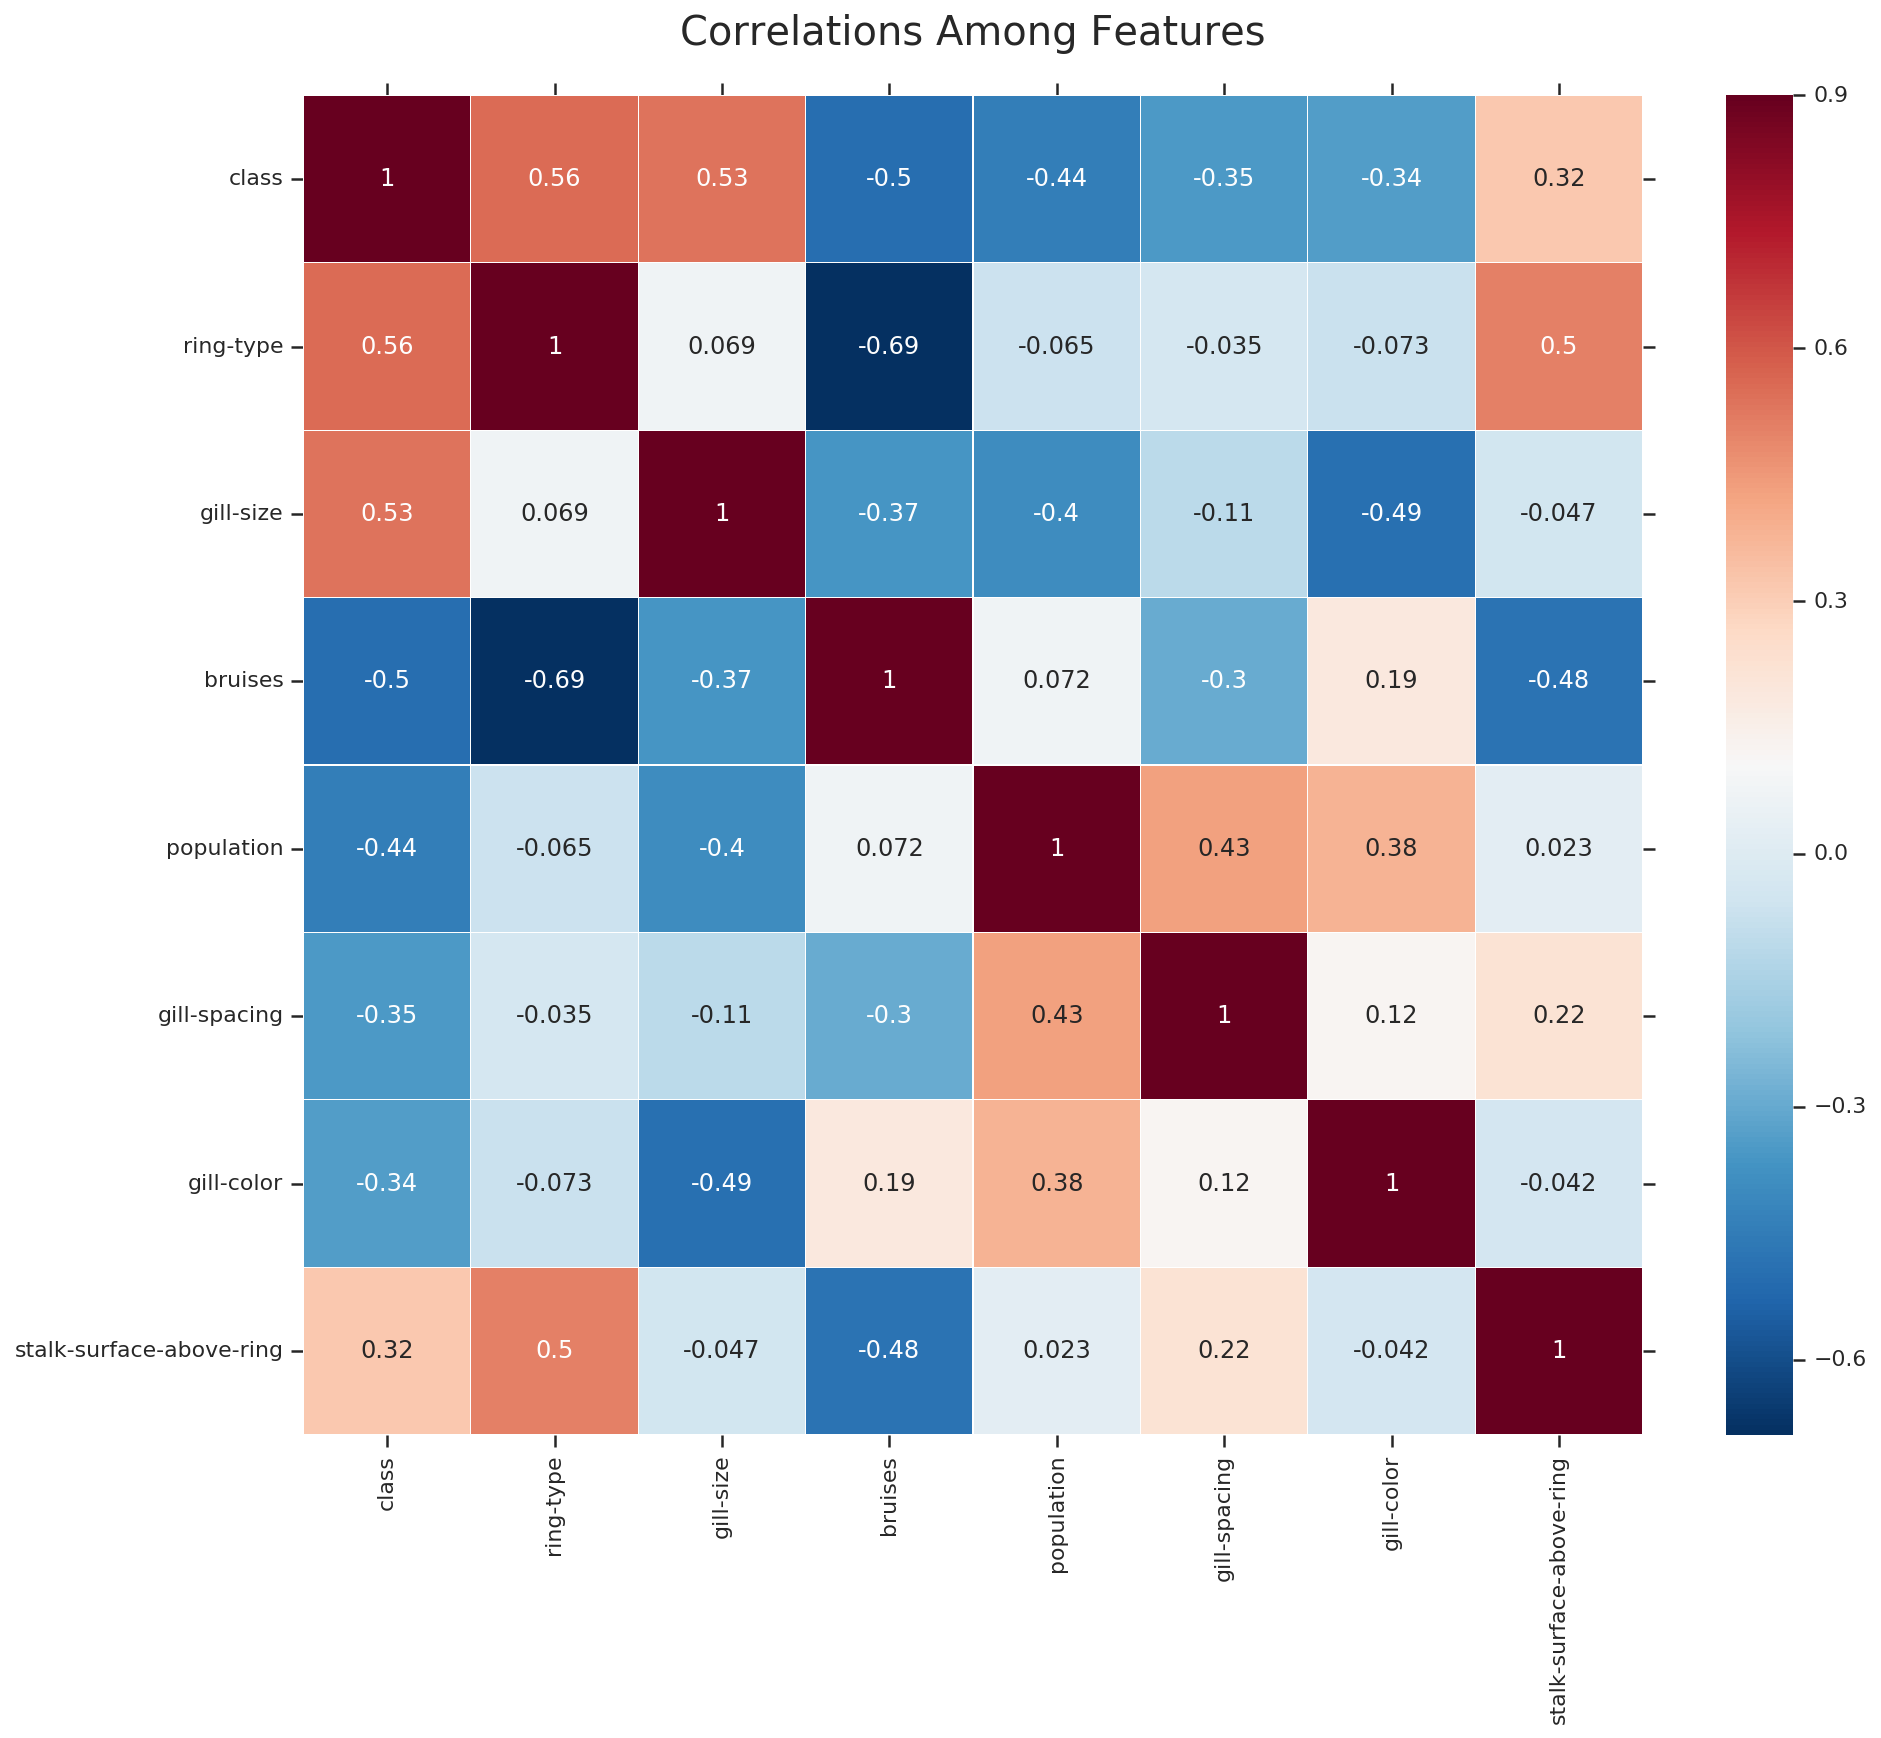

In [232]:
## heatmap to see the correlation between features.
# Gerate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_copy2.corr(), dtype=np.bool)
plt.subplots(figsize = (15, 12))
sns.heatmap(train_copy2.corr(), annot=True, cmap = 'RdBu_r', linewidths=0.1, linecolor='white', vmax=.9, square=True)
plt.title("Correlations Among Features", y = 1.03, fontsize = 20)

#### Positive Correlation Features:
    ring-type: 0.56
    gill-size: 0.53
    stalk-surface-above-ring: 0.32
#### Negatice Correlation Features:
    bruises: -0.5
    population: -0.44
    gill-spacing: -0.35
    gill-color:-0.34